# Protein Works Marketing Data Presentation

## Set-up of dependencies

Before starting, we shall do the necessary set-up for this project. Firstly, we install the appropriate packages using pip into you virtual environment in order to import the python packages we need.

In [3]:
pip install pandas
pip install fsspec
pip install openpyxl
pip install seaborn
pip install matplotlib

     ---------------------------------------- 11.1/11.1 MB 8.0 MB/s eta 0:00:00
     -------------------------------------- 341.8/341.8 kB 7.1 MB/s eta 0:00:00
     ---------------------------------------- 15.6/15.6 MB 6.6 MB/s eta 0:00:00
     -------------------------------------- 502.3/502.3 kB 7.8 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.

[notice] A new release of pip available: 22.2.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Once these packages have been installed, we then import them to our interactive notebook in order to use them in this project.

In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning) #to ignore warning messages from seaborn plots

import pandas as pd #package for creating dataframe
import seaborn as sns #package for visualisation
import matplotlib.pyplot as plt #package for visualisation
import numpy as np
from matplotlib.dates import DateFormatter

## **Task 1** (Marketing Metrics)

We begin by loading in the relevent datasets from the given excel file. We label the dataset regarding the marketing data as *marketing_data_df* and the dataset for the trading data as *trading_data_df*. 

In [236]:
file_path = r"C://Users//Daniel H//Desktop//Protein Work Project//Data and Presentation Brief.xlsx" #path of excel file
marketing_data_df = pd.read_excel(file_path, sheet_name = 0) #load excel file of dataset into pandas dataframe
trading_data_df = pd.read_excel(file_path, sheet_name = 1) #load excel file of transaction data into pandas dataframe

print('The Marketing dataset,\n')
marketing_data_df.info()
print()
print('\nThe Trading dataset,\n')
trading_data_df.info()

The Marketing dataset,

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 315 entries, 0 to 314
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   date                       315 non-null    datetime64[ns]
 1   country                    315 non-null    object        
 2   tpw_channels               315 non-null    object        
 3   spend                      315 non-null    int64         
 4   impressions                315 non-null    int64         
 5   clicks                     315 non-null    int64         
 6   revenue                    315 non-null    int64         
 7   transactions               315 non-null    int64         
 8   new_customer_transactions  315 non-null    int64         
dtypes: datetime64[ns](1), int64(6), object(2)
memory usage: 22.3+ KB


The Trading dataset,

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data column

Before we can perform any analysis on the data, we must first understand what the data represents. Here is a table which defines the meaning for each field in the marketing dataset.

|Field Name|Description|
|-|-|
|date|Date at which data we gathered for previous month. (YYYY-MM-DD)|
|country|Abbrievated country name the data was gathered from.|
|tpw_channels|The marketing strategy, Brand, Non-Brand or PLA (Product Listing Ads).|
|spend|The amount of money spent. (£)|
|impressions|The total number of views ads recieved.|
|clicks|The total number of clicks ads got.|
|revenue|The total revenue generated through adverts. (£)|
|transactions|The amount of transactions made through adverts.|
|new_customer_transactions|The amount of transactions made by new customers.|

Now that we have our data stored in dataframes, we can now calculate the desired metrics. The first metrics we will calculate is the **Spend-to-Revenue Ratio**, as a percentage. This can be calculated with the following formula;

$$
\text{S:R} = \frac{\text{Total Spend}}{\text{Total Revenue}} \times 100.
$$

In [174]:
total_spend = marketing_data_df['spend'].sum() #total sum of 'spend' column
total_revenue = marketing_data_df['revenue'].sum() #total sum of 'revenue' column
sr = round(total_spend*100/total_revenue,2) #evaluate ratio as percentage to 2dp
print(f"The ratio of spend to revenue (S:R), as a percentage, is:\n\n{sr}%")

The ratio of spend to revenue (S:R), as a percentage, is:

42.52%


We calculate that the S:R ratio at **42.52%**. So, for this period of time (Jan 2021 - Sept 2022), roughly 42% of revenue generated was used to cover its costs and expenditures. A lower metric value is usually desired, as a low ratio indicates a smaller proportion of revenue used to cover expenses. However, some industries naturally have a higher ratio than others. For example, retail, manufacturing and transportation *typically* have higher ratios as operational costs include rent, salaries, raw materials and fuel, which all scale with expanditure and therefore it's harder to lower this ratio below certain thresholds. Whereas industries such as e-commerce, software-as-a-service (SAAS) and financial services have *typically* lower ratios as the development od software is relatively cheaper and once finished, maintanence is low.

For Protein Works, who's main output is protein shakes (manufacturing), a ratio of 42.52% seems to indicate a healthy approach to spending in respect to revenue earned.

The second metric to calculate is the **Average Order Value**. This metric tells us how much revenue returned to expect per order. This is calculated with the following,

$$
\text{AOV} = \frac{\text{Total Revenue}}{\text{Total Number of Transactions}}.
$$

In [175]:
total_transactions = marketing_data_df['transactions'].sum() 
aov = round(total_revenue/total_transactions,2)
print(f'The Average Order Value (AOV) is:\n\n£{aov}')

The Average Order Value (AOV) is:

£39.82


We calculate that the average order value is **£39.82** for the period of January 2021 - September 2022.

The next metric is the **Cost per Acquisition**. This metric measures the expected amount spent during a period for each new customer acquired. This is simply the calculated with,

$$
\text{CPA} = \frac{\text{Total Spend}}{\text{Total New Customer}}.
$$

In [176]:
total_new_customer_transactions = marketing_data_df['new_customer_transactions'].sum()
cpa = round(total_spend/total_new_customer_transactions,2)
print(f'The Cost per Acquisition (CPA) is:\n\n£{cpa}')

The Cost per Acquisition (CPA) is:

£33.09


During the studied period, we see that Protein Works' CPA is **£33.09**. Without any historical data to refer to and not knowing the interal goals set by management about the cost per new customer acquired, I cannot say whether this value reflects positively or negatively. However, if used alongside the previously evaluated AOV metric, we can state that we can expect every £33.09 spent on acquiring a new customer, that customer will put back into the company £39.82. So we can say that for each new customer, we can expect a profit of £6.72. This does assume that the newly acquired customer's AOV follows the same distribution as the previous customers.

The next metric we want toe measure is the **Click Through Rate**. This metric is simply what percentage of people who viewed our adverts went on to click the ad. It is a measure of how efficient Protein Works' advertisement is doing in general at drawing in customers. This is calculated with the following,

$$
\text{CTR} = \frac{\text{Total clicks on ads}}{\text{Total views on ads}} \times 100.
$$

In [177]:
total_clicks = marketing_data_df['clicks'].sum()
total_impressions = marketing_data_df['impressions'].sum()
ctr = round(total_clicks*100/total_impressions,2)
print(f'The Click through rate (CTR) is:\n\n{ctr}%')

The Click through rate (CTR) is:

0.79%


The calculated Click Through Rate is **0.79%**, meaning that for every 1000 people who view Protein Works' adverts across the 5 coutnries this data is gathers from, we would expect roughly 8 people to click on it and go to the businesses website. However, we also need to calculate how many of them would go on to buy something from the company.

The final metric is the Conversion rate, the rate at which a customer on the website makes a purchase. This is calculate with,

$$
\text{CVR} = \frac{\text{Total number of transactions}}{\text{Total clicks on ads}}\times 100.
$$

In [178]:
total_transactions = marketing_data_df['transactions'].sum()
cvr = round(total_transactions*100/total_clicks,2)
print(f'The Conversion rate (CVR) is:\n\n{cvr}%')

The Conversion rate (CVR) is:

5.77%


The Conversion rate of Protein Works is **5.77%**. This means that for every 100 people who view your online store, roughly 6 people will end up making a transaction. Using this and the previously calculated metric of the CVR, we can state that,

$$
\mathbb{P}[\text{'An impression leads to a purchase'}] = (0.79 \times 5.77)\% = 4.5583\%.
$$

So on average roughly 4.5% of impressions on a Protein Works advert end up making a purchase. In order to increase this expected value of returns to the company, you either increase the CTR by more efficient or targetted advertisement strategies, or by increasing the CVR by improving UI experience by A/B testing. These are however just example suggestions on how to improve and to know that a practical limit to these values exists.

In Summary,

|Metric|Value|
|-|-|
|S:R| 42.52% |
|AOV| £39.82 |
|CPA| £33.09 |
|CTR| 0.79% |
|CVR| 5.77% |

In [179]:
marketing_data_df = marketing_data_df.sort_values(by=['date','country','tpw_channels'],ascending=True)

def generate_metrics(df):
    df['spend_revenue_ratio'] = df['spend']*100/df['revenue'] #create S:R column
    df['average_order_value'] = df['revenue']/df['transactions'] #create AOV column
    df['cost_per_acquisition'] = df['spend']/df['new_customer_transactions'] #create CPA column
    df['click_through_rate'] = df['clicks']*100/df['impressions'] #create CTR column
    df['conversion_rate'] = df['transactions']*100/df['clicks'] #create CVR column
    return df

marketing_data_df = generate_metrics(marketing_data_df)
display(marketing_data_df.head())

,date,country,tpw_channels,spend,impressions,clicks,revenue,transactions,new_customer_transactions,spend_revenue_ratio,average_order_value,cost_per_acquisition,click_through_rate,conversion_rate
111,2021-01-01,DE,Brand,164,1335,484,1039,18,5,15.784408,57.722222,32.8,36.254682,3.719008
288,2021-01-01,DE,Non-Brand,39,832,70,63,1,1,61.904762,63.000000,39.0,8.413462,1.428571
18,2021-01-01,DE,PLA,589,204746,1166,0,0,0,inf,NaN,inf,0.569486,0.000000
114,2021-01-01,FR,Brand,121,1315,538,1070,21,5,11.308411,50.952381,24.2,40.912548,3.903346
232,2021-01-01,FR,Non-Brand,89,3384,257,116,3,1,76.724138,38.666667,89.0,7.594563,1.167315


In [180]:
all_channels_marketing_data_df = marketing_data_df.groupby(['date','country'])[['spend','impressions','clicks','revenue','transactions','new_customer_transactions']].sum().reset_index()

all_channels_marketing_data_df = generate_metrics(all_channels_marketing_data_df)
display(marketing_data_df[marketing_data_df['country']=='FR'][['date','impressions','clicks','click_through_rate','tpw_channels']].head())
display(all_channels_marketing_data_df[all_channels_marketing_data_df['country']=='FR'][['date','impressions','clicks','click_through_rate']])

,date,impressions,clicks,click_through_rate,tpw_channels
114,2021-01-01,1315,538,40.912548,Brand
232,2021-01-01,3384,257,7.594563,Non-Brand
4,2021-01-01,142886,567,0.396820,PLA
124,2021-02-01,673,273,40.564636,Brand
291,2021-02-01,524,49,9.351145,Non-Brand


,date,impressions,clicks,click_through_rate
1,2021-01-01,147585,1362,0.922858
6,2021-02-01,159398,942,0.590974
11,2021-03-01,1132191,7246,0.639998
16,2021-04-01,1167273,9911,0.849073
21,2021-05-01,1563881,3133,0.200335
26,2021-06-01,1213164,4403,0.362935
31,2021-07-01,1230158,6696,0.544320
36,2021-08-01,1167475,5390,0.461680
41,2021-09-01,948232,5412,0.570746
46,2021-10-01,678869,4459,0.656828


## **Task 2** (Marketing Exploratory Data Analysis and Visualisation)

### Detecting Anomalies

For detecting anomalies, there are varying approaches to this problem. One approach is using statistical tests and transformations to assertain whether anomilous data exists. These can include using the Interquartile Range (IQR). If a data point is not found within 1.5 times this IQR, then we could make a case for this data point to be an anomaly.

$$
\mu - 1.5 \cdot IQR < X < \mu + 1.5 \cdot IQR, \text{ where   } IQR := Q_3 - Q_1.
$$

We could also transform our data into a more standardised form using Z-Scored. Using the mean ($\mu$) and the standard deviation ($\sigma$) of the data set, we can transform the data into values that represent their relative distance from the mean. If a point has an absolute Z-score of over 2 or 3, then we could class that point as an anomaly.

$$
X \rightarrow{} Z := \frac{X - \mu}{\sigma}.
$$

Another way is using a Simple Moving Average (SMA). Used in time series analysis, it provides information about trends dependent upon the timespan you use for it. If the mean deviates significantly, then an anomaly may be present.

However, visualising the data inself can be as equally useful in regards to anomaly detection, and can show you seasonal trends which may be mistaken as anomalies by the statistical approaches.

Furthermore, common-sense can help elimanate anomalous data when seen. For instance, it is impossible for any of the numerical values within this dataset to be negative as they are empirical measurments. Therefore, if any values are stored as negative then we know sometings is wrong (as you can't have negative amount of impressions or a negative number of times your adverts where clicked on). Also, we know that the number of new transactions must be apart of the total transactions, so if we find values such that '*new_customer_transactions*' > '*transactions*' we can consider them to be anomalous. Furthermore, if the new of transactions is 0, then you would expect the revenue to be 0 as well. If this is not the case for some records, then an error may have been made.

- 'spend', 'impressions', 'clicks', 'revenue', 'transaction', 'new_customer_transactions' $\geq$ 0,
- 'impressions $\geq$ 'clicks',
- 'transactions' $\geq$ 'new_customer_transactions',
- If 'transactions' = 0 $\implies$ 'revenue' = 0.

We can quickly check for the first condition of positivity.

In [181]:
display(marketing_data_df[(marketing_data_df[['spend','impressions','clicks','revenue','transactions','new_customer_transactions']] < 0).any(axis=1)])

,date,country,tpw_channels,spend,impressions,clicks,revenue,transactions,new_customer_transactions,spend_revenue_ratio,average_order_value,cost_per_acquisition,click_through_rate,conversion_rate
264,2021-05-01,FR,Non-Brand,1008,33134,-3523,877,18,12,114.937286,48.722222,84.00,-10.632583,-0.510928
248,2021-06-01,FR,Non-Brand,305,9772,-929,428,11,4,71.261682,38.909091,76.25,-9.506754,-1.184069


We have found 2 records which both have negative values for the number of clicks. To deal with this, lets have a look at the context of these values and see if their absolute value is roughly equal to the surrounding values.

In [182]:
display(marketing_data_df[(marketing_data_df['country'] == 'FR')&(marketing_data_df['tpw_channels'] == 'Non-Brand')][['date','clicks']].sort_values('date',ascending=True))

,date,clicks
232,2021-01-01,257
291,2021-02-01,49
255,2021-03-01,2153
263,2021-04-01,4084
264,2021-05-01,-3523
248,2021-06-01,-929
245,2021-07-01,1511
244,2021-08-01,454
246,2021-09-01,1198
247,2021-10-01,1210


As we can see, the absolute value of our negative values are roughly equal to the surrounding data. This may indicate to us that this data specifically was simply entered incorrectly with the addition of the negative sign, with the absolute value itself correct. To correct this we simply change the sign of the data (noting the change for later talks with management).

In [183]:
marketing_data_df['clicks'] = marketing_data_df['clicks'].apply(lambda x: -x if x<0 else x) #multiple the negative values with -1
display(marketing_data_df[(marketing_data_df['country']=='FR')&(marketing_data_df['date']=='2021-05-01')]) #

,date,country,tpw_channels,spend,impressions,clicks,revenue,transactions,new_customer_transactions,spend_revenue_ratio,average_order_value,cost_per_acquisition,click_through_rate,conversion_rate
187,2021-05-01,FR,Brand,242,2255,920,4278,86,30,5.656849,49.744186,8.066667,40.798226,9.347826
264,2021-05-01,FR,Non-Brand,1008,33134,3523,877,18,12,114.937286,48.722222,84.000000,-10.632583,-0.510928
57,2021-05-01,FR,PLA,5049,1528492,5736,2520,81,67,200.357143,31.111111,75.358209,0.375272,1.412134


We can see that the 'Non-Brand' data for 'clicks' has now been changes to be positive while the rest of the data remains positive. No we will check for the second condition we established ('impressions' > 'clicks').

In [184]:
display(marketing_data_df[marketing_data_df['impressions'] < marketing_data_df['clicks']])

,date,country,tpw_channels,spend,impressions,clicks,revenue,transactions,new_customer_transactions,spend_revenue_ratio,average_order_value,cost_per_acquisition,click_through_rate,conversion_rate
151,2022-01-01,FR,Brand,254,2114,2328,3797,81,27,6.689492,46.876543,9.407407,110.122990,3.479381
202,2022-03-01,FR,Brand,477,2254,2323,4466,91,31,10.680699,49.076923,15.387097,103.061224,3.917348
201,2022-04-01,FR,Brand,329,2026,2078,4167,87,25,7.895368,47.896552,13.160000,102.566634,4.186718
197,2022-07-01,FR,Brand,275,1847,1893,4247,75,24,6.475159,56.626667,11.458333,102.490525,3.961965
150,2022-08-01,FR,Brand,308,2052,2085,3937,77,20,7.823216,51.129870,15.400000,101.608187,3.693046
164,2022-09-01,FR,Brand,123,783,810,1967,37,11,6.253177,53.162162,11.181818,103.448276,4.567901


We have found some data that breaks this rule, where the number of clicks exceeds the number of impressions. This curiously happens in France for Brand channels. Furthermore, this data was all gathered from the end of 2021. However, we cannot say for certain which value is incorrect. However, we may be able to get an idea of which column is incorrect be comparing them against eachother and other features of the dataset and use historical data. Since impressions, clicks and transactions all relate to eachother, we should be able to see where the error occured. Indeed,

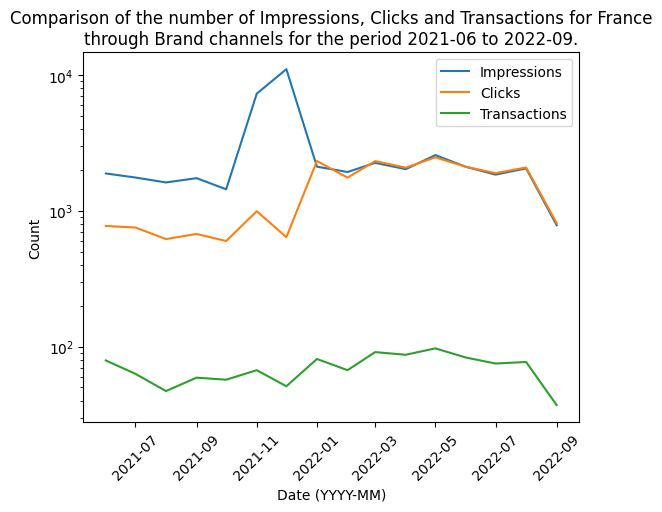

In [185]:
df = marketing_data_df[(marketing_data_df['country']=='FR')&(marketing_data_df['tpw_channels']=='Brand')&(marketing_data_df['date'] >= '2021-06-01')]
ax = sns.lineplot(x=df['date'],
             y=df['impressions'],
             label='Impressions')
ax = sns.lineplot(x=df['date'],
             y=df['clicks'],
             label='Clicks')
ax = sns.lineplot(x=df['date'],
             y=df['transactions'],
             label='Transactions')
ax = ax.set_xticklabels(ax.get_xticklabels(),rotation=45)
plt.xlabel('Date (YYYY-MM)')
plt.ylabel('Count')
plt.title('Comparison of the number of Impressions, Clicks and Transactions for France\nthrough Brand channels for the period 2021-06 to 2022-09.')
plt.yscale('log')
plt.show()

Above are the trend lines for each of the features we are observing, Impressions, Clicks and Transactions. We can see that throughout this period, the clicks and the transactions follow each other near perfectly, were one increases, the other increases also. Furthermore, they stay relatively at constant widths apart showing strong linear correlation between the two. However, we see that after a period of increase in impressions, which is clearly matched by the number of clicks for the period 2021-10 to 2021-12, the number of impressions sharply decreases to match the number of clicks where it remains almost exactly matching the values. Since no other trend line follows this pattern, it does suggest that it is the impression count that is incorrect. Perhaps by error of collection, where a missing 1 is meant to be at the beginning of the impression count. This is futher backed up when considering the corralation coefficients of each feature.

In [186]:
display(df[['impressions','clicks','transactions']].corr())

,impressions,clicks,transactions
impressions,1.000000,-0.224281,-0.155667
clicks,-0.224281,1.000000,0.829963
transactions,-0.155667,0.829963,1.000000


It tells us that a weak negative correlation exists between impressions and the 2 other features, whereas a strong positive correlation exists between clicks and transactions. This tells us that the impression count for this period are incorrect and a problem exists within the collection process of this data. However, my theory about a missing 1 is simply a theory and there is no way of knowing for certain what this data is meant to be. So for now we shall leave it as it is while keeping these findings in mind when evaluating any trends we discover in the future.

Now we shall check our thrid condition for clean data ('transactions' > 'new_customer_transactions').

In [187]:
display(marketing_data_df[marketing_data_df['transactions'] < marketing_data_df['new_customer_transactions']])

,date,country,tpw_channels,spend,impressions,clicks,revenue,transactions,new_customer_transactions,spend_revenue_ratio,average_order_value,cost_per_acquisition,click_through_rate,conversion_rate
275,2022-05-01,IE,Non-Brand,660,20103,1004,1003,24,38,65.802592,41.791667,17.368421,4.994279,2.390438
73,2022-05-01,IE,PLA,1158,193603,1134,2020,55,93,57.326733,36.727273,12.451613,0.585735,4.850088
269,2022-06-01,IE,Non-Brand,738,19265,973,889,22,43,83.014623,40.409091,17.162791,5.050610,2.261048
77,2022-06-01,IE,PLA,1660,274070,1898,2171,66,120,76.462460,32.893939,13.833333,0.692524,3.477345
253,2022-07-01,IE,Non-Brand,400,11169,511,488,12,23,81.967213,40.666667,17.391304,4.575163,2.348337
75,2022-07-01,IE,PLA,1196,208778,1180,2304,59,103,51.909722,39.050847,11.611650,0.565194,5.000000
259,2022-08-01,IE,Non-Brand,546,12266,624,558,15,28,97.849462,37.200000,19.500000,5.087233,2.403846
44,2022-08-01,IE,PLA,1531,246912,1527,3075,88,163,49.788618,34.943182,9.392638,0.618439,5.762934
236,2022-09-01,IE,Non-Brand,158,2623,160,206,5,10,76.699029,41.200000,15.800000,6.099886,3.125000
38,2022-09-01,IE,PLA,572,86376,629,1186,31,55,48.229342,38.258065,10.400000,0.728212,4.928458


Here we discover that 10 entries break this condition, all from Ireland through Non-Brand and PLA channels for the final 5 months of the data. Furthermore, we see that the number of new customer transactions is roughly double the total number of transactions for each. This suggest that an error has occured with the collection process of this data. However, the fact that the count for the new customer transactions does not exceed 2 times that of the transactions suggest that maybe the transaction count was added to the new customer transaction count by mistake when it was gathered.

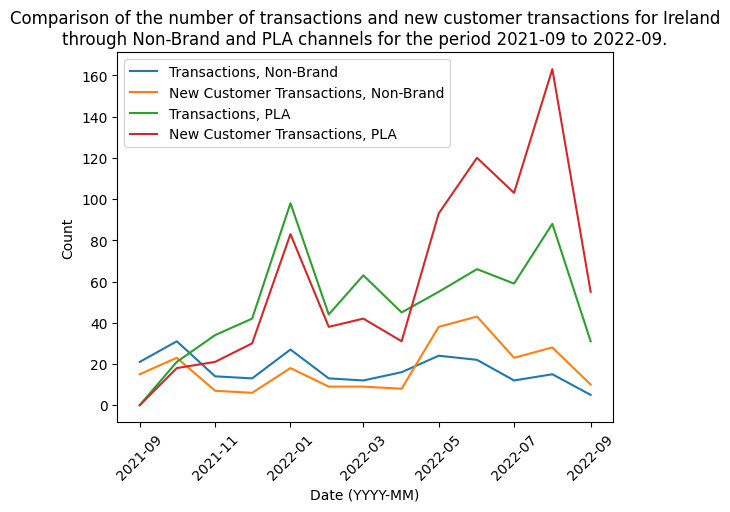

In [188]:
df = marketing_data_df[(marketing_data_df['country']=='IE')&(marketing_data_df['tpw_channels']!='Brand')&(marketing_data_df['date'] >= '2021-09-01')]
ax = sns.lineplot(x=df[df['tpw_channels']=='Non-Brand']['date'],
                  y=df[df['tpw_channels']=='Non-Brand']['transactions'],
                  label='Transactions, Non-Brand')
ax = sns.lineplot(x=df[df['tpw_channels']=='Non-Brand']['date'],
                  y=df[df['tpw_channels']=='Non-Brand']['new_customer_transactions'],
                  label='New Customer Transactions, Non-Brand')
ax = sns.lineplot(x=df[df['tpw_channels']=='PLA']['date'],
                  y=df[df['tpw_channels']=='PLA']['transactions'],
                  label='Transactions, PLA')
ax = sns.lineplot(x=df[df['tpw_channels']=='PLA']['date'],
                  y=df[df['tpw_channels']=='PLA']['new_customer_transactions'],
                  label='New Customer Transactions, PLA')
ax = ax.set_xticklabels(ax.get_xticklabels(),rotation=45)
plt.xlabel('Date (YYYY-MM)')
plt.ylabel('Count')
plt.title(f'Comparison of the number of transactions and new customer transactions for Ireland\nthrough Non-Brand and PLA channels for the period 2021-09 to 2022-09.')
plt.show()

We see that a clear spike occurs for the 2022-05 data and onwards, where the number of transactions from new customers overtakes the number of total transactions, which is impossible. However, if we apply our theory of the number of transactions being added to the new_customer_transactions by mistake, we get the following figure.

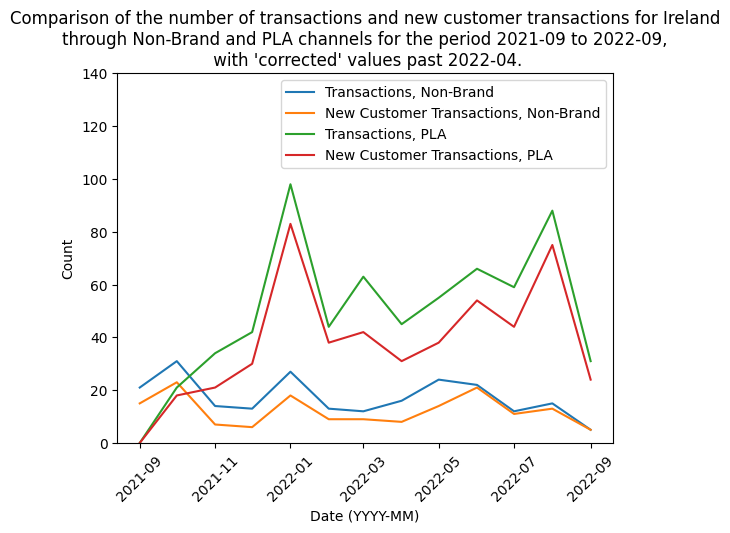

In [189]:
df = marketing_data_df[(marketing_data_df['country']=='IE')&(marketing_data_df['tpw_channels']!='Brand')&(marketing_data_df['date'] >= '2021-09-01')]

condition = (df['transactions']<=df['new_customer_transactions'])
df.loc[condition, 'new_customer_transactions'] -= df.loc[condition, 'transactions']
df.loc[~condition, 'new_customer_transactions'] = df['new_customer_transactions']

ax = sns.lineplot(x=df[df['tpw_channels']=='Non-Brand']['date'],
                  y=df[df['tpw_channels']=='Non-Brand']['transactions'],
                  label='Transactions, Non-Brand')
ax = sns.lineplot(x=df[df['tpw_channels']=='Non-Brand']['date'],
                  y=df[df['tpw_channels']=='Non-Brand']['new_customer_transactions'],
                  label='New Customer Transactions, Non-Brand')
ax = sns.lineplot(x=df[df['tpw_channels']=='PLA']['date'],
                  y=df[df['tpw_channels']=='PLA']['transactions'],
                  label='Transactions, PLA')
ax = sns.lineplot(x=df[df['tpw_channels']=='PLA']['date'],
                  y=df[df['tpw_channels']=='PLA']['new_customer_transactions'],
                  label='New Customer Transactions, PLA')
ax = ax.set_xticklabels(ax.get_xticklabels(),rotation=45)
plt.ylim(0,140)
plt.xlabel('Date (YYYY-MM)')
plt.ylabel('Count')
plt.title(f'Comparison of the number of transactions and new customer transactions for Ireland\nthrough Non-Brand and PLA channels for the period 2021-09 to 2022-09,\n with \'corrected\' values past 2022-04.')
plt.show()

The data now makes sense, as the number of new customer transactions never exceeds the total amount of transactions and that they follow very similar patterns are increase and decline throughout the period. Therefore, I feel confident in state that this issue has been resolved, but still keeping the issue in mind.

In [190]:
condition = (marketing_data_df['transactions']<=marketing_data_df['new_customer_transactions']) #condition
marketing_data_df.loc[condition, 'new_customer_transactions'] -= marketing_data_df.loc[condition, 'transactions'] #take away values if condition is met
marketing_data_df.loc[~condition, 'new_customer_transactions'] = marketing_data_df['new_customer_transactions'] #return original values is condition is not met

We can now check our final rule for clean data (If 'impressions','clicks','transactions' = 0 $\implies$ 'revenue' = 0).

In [191]:
display(marketing_data_df[(marketing_data_df['impressions']==0)&(marketing_data_df['clicks']==0)&(marketing_data_df['transactions']==0)&(marketing_data_df['revenue']!=0)])

,date,country,tpw_channels,spend,impressions,clicks,revenue,transactions,new_customer_transactions,spend_revenue_ratio,average_order_value,cost_per_acquisition,click_through_rate,conversion_rate
210,2022-04-01,FR,Non-Brand,0,0,0,10,0,0,0.0,inf,NaN,NaN,NaN
9,2022-04-01,IT,PLA,0,0,0,9,0,0,0.0,inf,NaN,NaN,NaN
16,2022-05-01,IT,PLA,0,0,0,25,0,0,0.0,inf,NaN,NaN,NaN
6,2022-06-01,IT,PLA,0,0,0,9,0,0,0.0,inf,NaN,NaN,NaN
8,2022-08-01,IT,PLA,0,0,0,3536,0,0,0.0,inf,NaN,NaN,NaN


Here we see that there are 5 cases where revenue is generated without any transactions, impressions or clicks. Unless the data for transactions, impressions and clicks are all corrupted for this period, then we can safely say that the revenue data is incorrect for those dates and places. However, before we correct this we should view this data in context first.

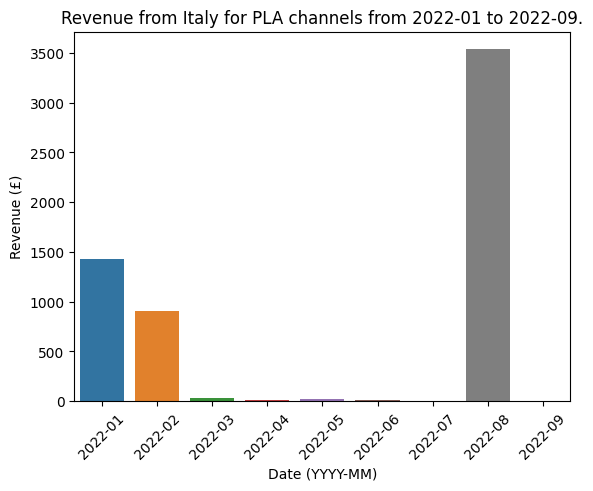

In [192]:
df = marketing_data_df[(marketing_data_df['country']=='IT')&(marketing_data_df['tpw_channels']=='PLA')&(marketing_data_df['date']>='2022-01-01')].copy()

df['date'] = pd.to_datetime(df['date'])
df['date'] = df['date'].dt.to_period('M')

ax = sns.barplot(data=df,
    x='date',
    y='revenue'
)
plt.xticks(rotation=45)
plt.title('Revenue from Italy for PLA channels from 2022-01 to 2022-09.')
plt.xlabel('Date (YYYY-MM)')
plt.ylabel('Revenue (£)')

plt.show()

We can clearly see that revenue was declining thoughout 2022, and that the data we are examining is indeed incorrect as as will be revalued at 0.

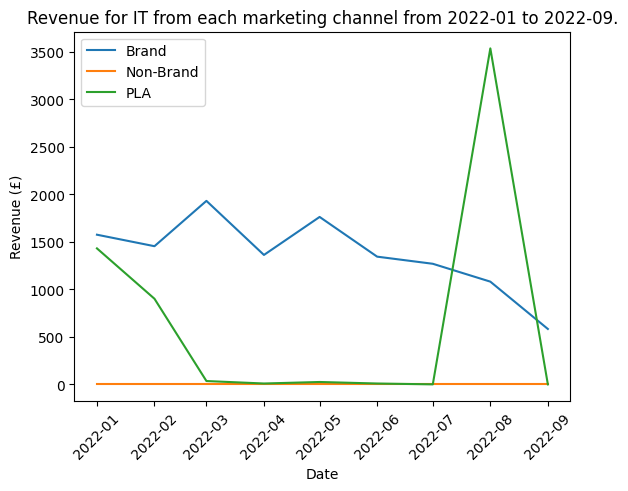

In [193]:
df = marketing_data_df[(marketing_data_df['country']=='IT')&(marketing_data_df['date']>='2022-01-01')].copy()

sns.lineplot(data = df[df['tpw_channels']=='Brand'],
             x='date',
             y='revenue',
             label='Brand')
sns.lineplot(data = df[df['tpw_channels']=='Non-Brand'],
             x='date',
             y='revenue',
             label='Non-Brand')
sns.lineplot(data = df[df['tpw_channels']=='PLA'],
             x='date',
             y='revenue',
             label='PLA')

plt.title('Revenue for IT from each marketing channel from 2022-01 to 2022-09.')
plt.xticks(rotation=45)
plt.xlabel('Date')
plt.ylabel('Revenue (£)')
plt.show()

As the revenue from Brand channels was declining from 2022-05 onwards, it is hard to believe that the £3536 from revenue was generated from this. Therefore it is difficult to justify that revenue being mislabeled from Brand to PLA. Therefore, the anomalous data will be replaced with 0s. However, if this revenue turnsout to be correct, further investigation will have to be conducted.

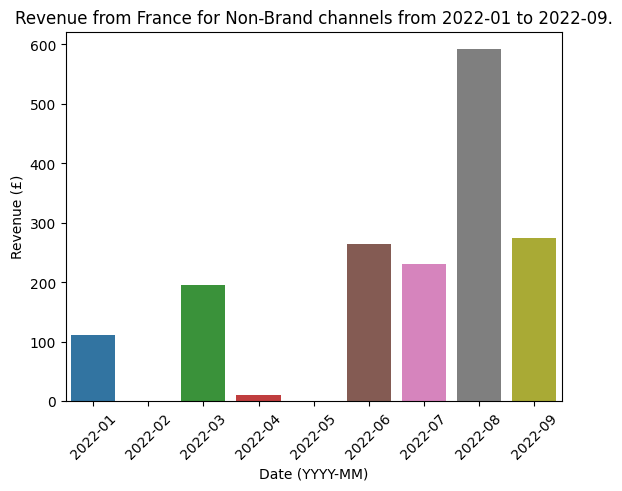

In [194]:
df = marketing_data_df[(marketing_data_df['country']=='FR')&(marketing_data_df['tpw_channels']=='Non-Brand')&(marketing_data_df['date']>='2022-01-01')].copy()

df['date'] = pd.to_datetime(df['date'])
df['date'] = df['date'].dt.to_period('M')

ax = sns.barplot(data=df,
    x='date',
    y='revenue'
)
plt.xticks(rotation=45)
plt.title('Revenue from France for Non-Brand channels from 2022-01 to 2022-09.')
plt.xlabel('Date (YYYY-MM)')
plt.ylabel('Revenue (£)')

plt.show()

Furthermore, revenue for the following month of the observed month (2022-04) is also 0, meaning that the revenue that was generated was also inaccurate and will also be revalued at 0.

In [195]:
condition = (marketing_data_df['impressions']==0)&(marketing_data_df['clicks']==0)&(marketing_data_df['transactions']==0)&(marketing_data_df['revenue']!=0)
marketing_data_df.loc[condition,'revenue'] = 0

With those errors corrected, we can also check the inverse possibility ('revenue' $\neq$ 0 $\implies$ 'transactions' $\neq$ 0).

In [196]:
display(marketing_data_df[(marketing_data_df['transactions']==0)&(marketing_data_df['revenue']!=0)])

,date,country,tpw_channels,spend,impressions,clicks,revenue,transactions,new_customer_transactions,spend_revenue_ratio,average_order_value,cost_per_acquisition,click_through_rate,conversion_rate
7,2021-01-01,IT,PLA,357,193787,953,22,0,0,1622.727273,inf,inf,0.491777,0.0
0,2021-02-01,IT,PLA,260,154207,690,23,0,0,1130.434783,inf,inf,0.447451,0.0


Here we have found 2 records of there being revenue and no transaction. However, there is data on the impressions and clicks, suggesting that the error is with the transactions and not the revenue. However, how many transactions were there. We cannot know for certain but we can use the AOV of the other months for Italy through the PLA channels to how many to expect.

In [197]:
df = marketing_data_df[(marketing_data_df['country']=='IT')&(marketing_data_df['tpw_channels']=='PLA')&(marketing_data_df['transactions']!=0)]
display(df['revenue']/df['transactions']) #calculate AOV

25    37.375000
29    31.071429
30    30.400000
34    33.375000
31    34.058824
72    31.800000
37    31.068966
49    35.000000
dtype: float64

We see that the AOV for a transaction is roughly £30 for Italy from PLA channels. Therefore, it is safe to assume that there was at least 1 transaction that resulted in that revenue and that there was no more, if we are to try and follow the AOV.

In [198]:
condition = ((marketing_data_df['transactions']==0)&(marketing_data_df['revenue']!=0))
marketing_data_df.loc[condition,'transactions'] = 1

However, what we cannot do it determine whether that customer was a new customer or not. Thus, we shall assume that they were not new and leave that field 0.

Now that the anomalous data has been rectified as best as possible, we can re-evaluate the metrics which were influenced by them, and correct any anomalous metrics such as inf S:R ratio, arising from dividing by 0, with simply substituion.

In [199]:
marketing_data_df = generate_metrics(marketing_data_df) #revaluated metrics

marketing_data_df.loc[(marketing_data_df['spend_revenue_ratio'] == np.inf)|(marketing_data_df['spend_revenue_ratio'].isna()), 'spend_revenue_ratio'] = 0
marketing_data_df.loc[marketing_data_df['average_order_value'].isna(), 'average_order_value'] = 0
marketing_data_df.loc[(marketing_data_df['cost_per_acquisition'] == np.inf)|(marketing_data_df['cost_per_acquisition'].isna()), 'cost_per_acquisition'] = 0
marketing_data_df.loc[(marketing_data_df['click_through_rate'] == np.inf)|(marketing_data_df['click_through_rate'].isna()), 'click_through_rate'] = 0
marketing_data_df.loc[(marketing_data_df['conversion_rate'] == np.inf)|(marketing_data_df['conversion_rate'].isna()), 'conversion_rate'] = 0

This clean dataset, with the corrected metrics, will now be saved locally.

In [201]:
marketing_data_df.to_excel('Clean Marketing Data.xlsx', index=False) #save our cleaned data with metrics

In [237]:
marketing_data_df = pd.read_excel("Clean Marketing Data.xlsx") #load in clean dataset

Reevaluate the metrics from task 1 as overall metrics will have changed as a result of data cleaning.

In [238]:
total_spend = marketing_data_df['spend'].sum() #total sum of 'spend' column
total_revenue = marketing_data_df['revenue'].sum() #total sum of 'revenue' column
sr = round(total_spend*100/total_revenue,2) #evaluate ratio as percentage to 2dp
print(f"The ratio of spend to revenue (S:R), as a percentage, is:\n\n{sr}%")

The ratio of spend to revenue (S:R), as a percentage, is:

42.57%


In [204]:
total_transactions = marketing_data_df['transactions'].sum() 
aov = round(total_revenue/total_transactions,2)
print(f'The Average Order Value (AOV) is:\n\n£{aov}')

The Average Order Value (AOV) is:

£39.77


In [205]:
total_new_customer_transactions = marketing_data_df['new_customer_transactions'].sum()
cpa = round(total_spend/total_new_customer_transactions,2)
print(f'The Cost per Acquisition (CPA) is:\n\n£{cpa}')

The Cost per Acquisition (CPA) is:

£33.45


In [206]:
total_clicks = marketing_data_df['clicks'].sum()
total_impressions = marketing_data_df['impressions'].sum()
ctr = round(total_clicks*100/total_impressions,2)
print(f'The Click through rate (CTR) is:\n\n{ctr}%')

The Click through rate (CTR) is:

0.8%


In [207]:
total_transactions = marketing_data_df['transactions'].sum()
cvr = round(total_transactions*100/total_clicks,2)
print(f'The Conversion rate (CVR) is:\n\n{cvr}%')

The Conversion rate (CVR) is:

5.73%


Our new overall metrics for our cleaned data is:

|Metric|Value|
|-|-|
|S:R|42.57%|
|AOV|£39.77|
|CPA|£33.45|
|CTR|0.8%|
|CVR|5.73%|

We observe an increase in the S:R ratio of 0.05%, a decrease in the AOV by £0.05, an increase in the CPA by £0.36, an increase in the CTR of 0.01% and a decrease in the CVR of 0.04%. However, we were unable to rectify the error in the number of impressions in France we discusses earlier, which would increase the number of impressions and lead to a decrease in the CTR.

In [208]:
all_channels_marketing_data_df = marketing_data_df.groupby(['date','country'])[['spend','impressions','clicks','revenue','transactions','new_customer_transactions']].sum().reset_index()
all_channels_marketing_data_df = generate_metrics(all_channels_marketing_data_df)

all_channels_marketing_data_df.to_excel("Total Channels Marketing Data.xlsx", index=False)
all_channels_marketing_data_df = pd.read_excel("Total Channels Marketing Data.xlsx")
display(all_channels_marketing_data_df[all_channels_marketing_data_df['country']=='FR'].head(10))

,date,country,spend,impressions,clicks,revenue,transactions,new_customer_transactions,spend_revenue_ratio,average_order_value,cost_per_acquisition,click_through_rate,conversion_rate
1,2021-01-01,FR,632,147585,1362,1186,24,6,53.288364,49.416667,105.333333,0.922858,1.762115
6,2021-02-01,FR,482,159398,942,2257,37,13,21.355782,61.000000,37.076923,0.590974,3.927813
11,2021-03-01,FR,3332,1132191,7246,5102,103,47,65.307722,49.533981,70.893617,0.639998,1.421474
16,2021-04-01,FR,4756,1167273,9911,6050,128,65,78.611570,47.265625,73.169231,0.849073,1.291494
21,2021-05-01,FR,6299,1563881,10179,7675,185,109,82.071661,41.486486,57.788991,0.650881,1.817467
26,2021-06-01,FR,4394,1213164,6261,6496,161,84,67.641626,40.347826,52.309524,0.516089,2.571474
31,2021-07-01,FR,3728,1230158,6696,3663,74,25,101.774502,49.500000,149.120000,0.544320,1.105137
36,2021-08-01,FR,3339,1167475,5390,2953,55,18,113.071453,53.690909,185.500000,0.461680,1.020408
41,2021-09-01,FR,3496,948232,5412,3926,83,35,89.047376,47.301205,99.885714,0.570746,1.533629
46,2021-10-01,FR,2466,678869,4459,5401,124,68,45.658211,43.556452,36.264706,0.656828,2.780893


### S:R Efficiency

As stated prior, the S:R is the ratio between the amount spent, to the revenue received as a result. The goal of a business is the maximise profits (revenue-spend), while decreasing the S:R ratio. A S:R ratio graater than 100% tells us that the company is spending more money than the company is recieving from revenue, generating a loss for the company. While a lower S:R ratio tells us how efficient the company is at running. If you are able to generate a constant revenue while reducing spending, will decrease the S:R ratio and generate more profits.

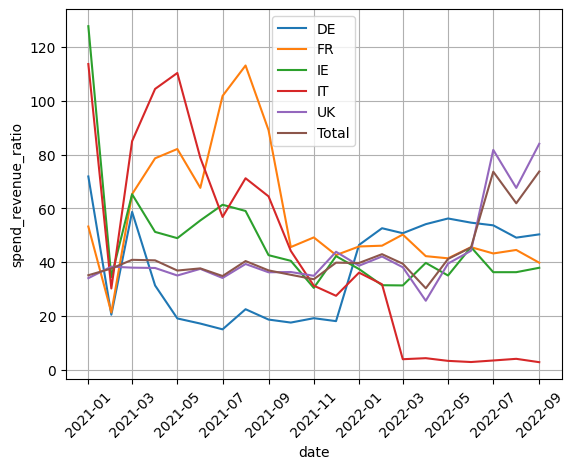

In [270]:
df = all_channels_marketing_data_df[['date','country','spend','revenue','spend_revenue_ratio']]
total_df = df.groupby('date')[['spend','revenue']].sum().reset_index()
total_df['spend_revenue_ratio'] = total_df['spend']*100/total_df['revenue']

sns.lineplot(data=df,
             x='date',
             y='spend_revenue_ratio',
             hue='country')
sns.lineplot(data=total_df,
             x='date',
             y='spend_revenue_ratio',
             label='Total')
plt.xticks(rotation=45)
plt.grid()
plt.show()

We observe for foreign countries, an erratic period at the start of the oberserved time interval with various instances of the S:R ratio above 100% (in France, Ireland and Italy). Then later the S:R levels out after usually a year, with stability at roughly 40% in France and Ireland, 50% in Germany and a flat-lining of S:R in Italy (due to heavy decline in spending for Italy market). For Germany, a significant increase before stability can also be explained due to spending changes, with an increase from £3000 for £10000 for this period.

For the UK, S:R remains relatively stabl from the start of the observed time period at roughly 40%, then sees a sharp increase at the end of Q1 for 2022. This results in the UK's S:R reaching over 80% by the end of the period. This rapid increase, along with the increase we observe in Germany, is a result of increased spend or decreased revenue for this period. We will see investigate which factor is influencing our S:R for these countries.

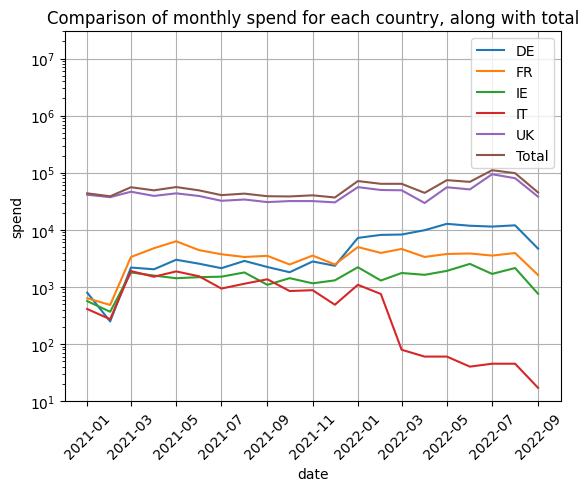

In [266]:
sns.lineplot(data=all_channels_marketing_data_df,
             x='date',
             y='spend',
             hue='country')
sns.lineplot(
    data=total_df,
    x='date',
    y='spend',
    label='Total'
)
plt.title('Comparison of monthly spend for each country, along with total')
plt.ylim(10,30000000)
plt.yscale('log')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

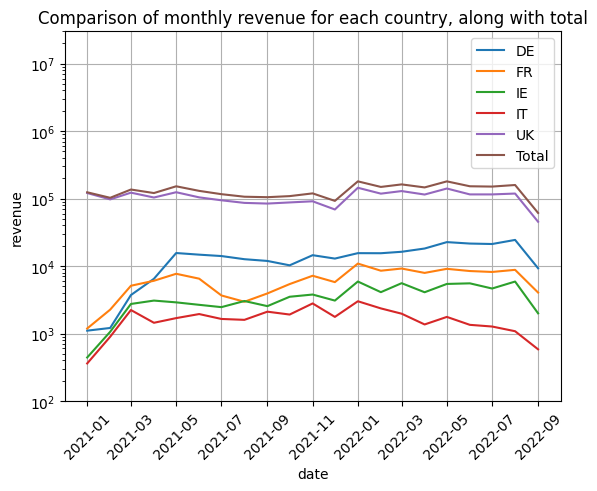

In [262]:
sns.lineplot(data=all_channels_marketing_data_df,
             x='date',
             y='revenue',
             hue='country')
sns.lineplot(
    data=total_df,
    x='date',
    y='revenue',
    label='Total'
)
plt.title('Comparison of monthly revenue for each country, along with total')
plt.ylim(100,30000000)
plt.yscale('log')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

We see that for Italy, the steep decline in S:R ratio was a result of cut spending and a much slower decline in revenue. Predictions for this see revenue fall to similar levels as spending resulting in an increase in S:R as customers stop seeing adverts for Protein Works in Italy and the few repeat customers that Italy have will most likely shop in more local stores for their products. An increase in spend seems to be the case for the increase in S:R in Germany and and UK. We also observe that the UK is the majority factor in overall performance, thus prioritising countries that have higher spend to analysis S:R is more important to maximise efficiency in S:R overall for the company.

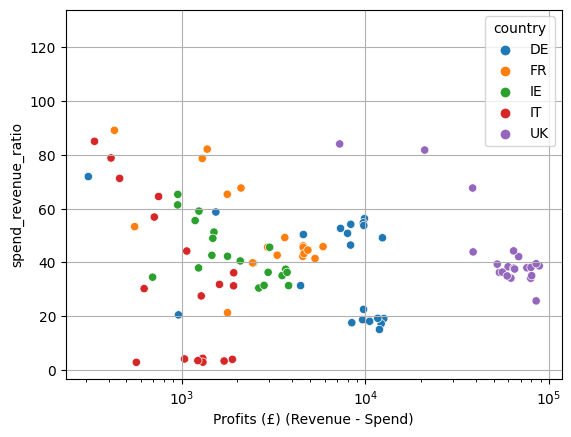

In [212]:
sns.scatterplot(x=df['revenue'] - df['spend'],
                y=df['spend_revenue_ratio'],
                hue=df['country'],
                )
plt.xscale('log')
plt.xlabel('Profits (£) (Revenue - Spend)')
plt.grid()
plt.show()

Using the previously calculated overall S:R ratio as a standard measure of S:R for the company, and the industry, we desire to lower the S:R for each country below this threshold point (42.57%), while maintaining or increasing profits. For this report, we will focus on Germany and the UK, as they contain records of high S:R and high profits which are high priority targets for us to improve due to the higher potential returns in profits. 

For the UK, S:R remained stable and contributed heavily to the overall S:R. However, a sharp spike in S:R was seen at the end of obersation period. This isn't inherently a bad thing, as the company may introduced a new marketing strategy which requires more spending or is working on expanding it's reach within the UK. This would result in an increase in spend that we see and also the lack of response from the market with new customers and increased revenue. We typically observe a change in spending to take several months afterwards to begin to return profits so more time is required inorder to se if this increase in spending is wise or not.

For Germany, we also see an increase in spending but afterwards, we see a slower increase in revenue returns as a result. This latency in returns may be nothing to worry about, with the german market for our products needing more times to increase, or a shift in marketing strategy with diverted spending into the wrong channels may be causing this slower increase.

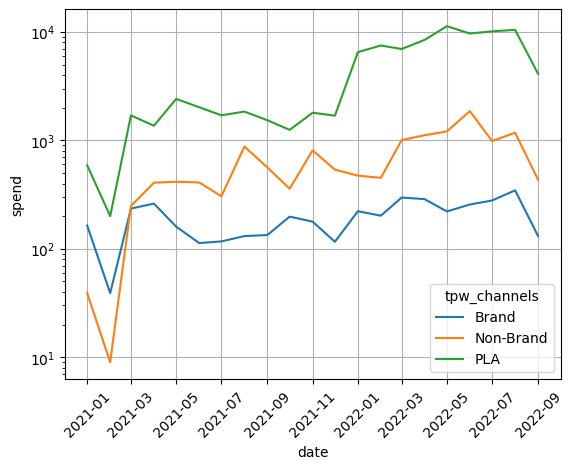

In [275]:
sns.lineplot(data=marketing_data_df[marketing_data_df['country']=='DE'],
             x='date',
             y='spend',
             hue='tpw_channels')
plt.yscale('log')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

For the first increase in spending for Feb 2021, we see that that the Non-Brand channels receive a high proportion increase in spend compared to the others. This increased in funding into Non-Brand channels resulted in the increase we desire over the next couple of months. Whereas the increase we are analysing in Dec 2021 sees a greater proportion increase in spending into PLA channels, with the others recieving relatively small increases in funding. This may indicate that Non-Brand channels are more effective at connecting customers with the our products. A new strategy of diverting spend funding from PLA into Non-Brand may lead to a more rapid increase in returns for the German market. We may get a better idea at what specifically is causing this shallower increase in revenue due to marketing strategy shifts by looking at the impression count for this period.

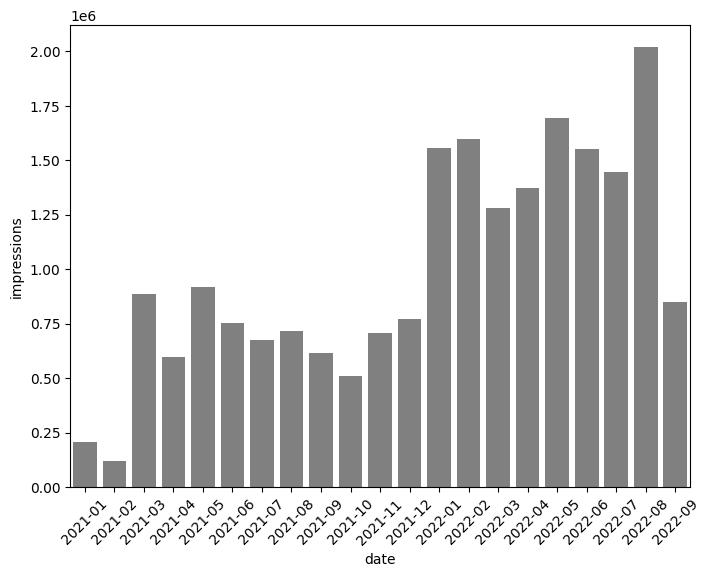

In [287]:
plt.figure(figsize=(8, 6))

hist_data = all_channels_marketing_data_df[all_channels_marketing_data_df['country']=='DE'].copy()
hist_data['date'] = pd.to_datetime(hist_data['date'])
hist_data['date'] = hist_data['date'].dt.to_period('M')

sns.barplot(data=hist_data,
            x='date',
            y='impressions',
            color='grey')
plt.xticks(rotation=45)
plt.show()

We can clearly see the periods when spending rapidly increased reflected in the impression count at 2021-02 and 2021-12. However, the first time resulted in an increase of roughly 3.5x what is was, whereas the second increase in spending increased impression by only 2x. This lower proportion increase would explain a slower increase in revenue. As the number of impressions is heavily correlated with revenue generated (with $r = 0.84956$) we can make a rough estimate and assume that we can model revenue with a linear function in respect to impressions. Thus, a higher proportional increase in impressions will return a greater increase in revenue.

In [293]:
display(all_channels_marketing_data_df[all_channels_marketing_data_df['country']=='DE'][['impressions','revenue']].corr())

,impressions,revenue
impressions,1.00000,0.84956
revenue,0.84956,1.00000


### France Engagement

We have been tasked with analysing the ad engagement of France. Engagement has done better than expected throughout this observation period. For this analysis, ad engagement will be measured by the click through rate (CTR), as this gives a likelihood of engaging with our adverts.

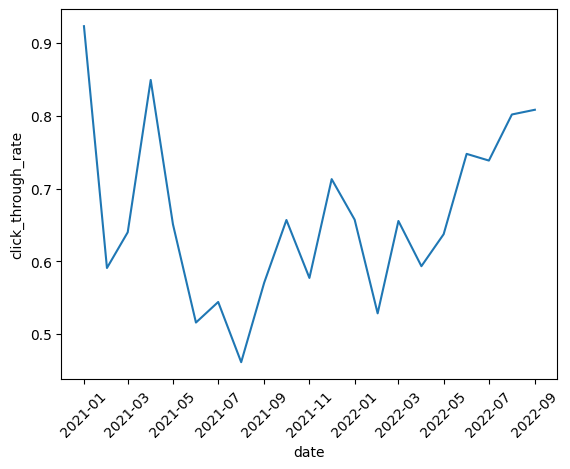

In [297]:
sns.lineplot(data=all_channels_marketing_data_df[all_channels_marketing_data_df['country']=='FR'],
             x='date',
             y='click_through_rate'
)
plt.xticks(rotation=45)
plt.show()

Through initial inspection, we see that the click through rate for France, across all channels, does begin to increase after a period of decline, starting from the beginning of the 2022 year. So with this increase identified, we will examine the individual marketing channels and see if any one of them is responsible for this increase.

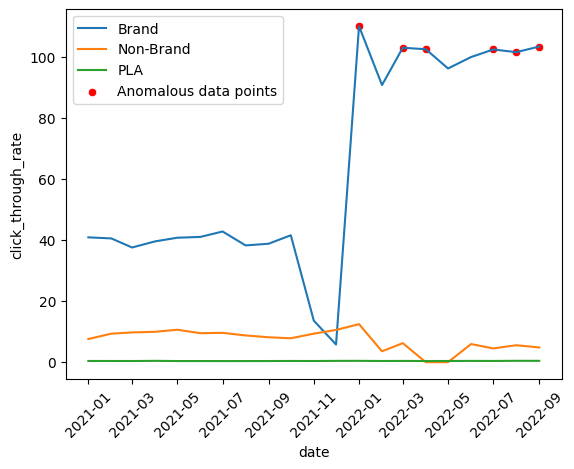

In [299]:
for channel in ['Brand','Non-Brand','PLA']:
    sns.lineplot(data=marketing_data_df[(marketing_data_df['country']=='FR')&(marketing_data_df['tpw_channels']==channel)],
                x='date',
                y='click_through_rate',
                ci=False,
                label=channel
    )
anom_data = marketing_data_df[marketing_data_df['impressions']<marketing_data_df['clicks']]
sns.scatterplot(x='date',
                y='click_through_rate',
                data=anom_data,
                color='r',
                label='Anomalous data points')
plt.xticks(rotation=45)
plt.show()

From the plot above, we return to the unclean data we encountered before regarding the number of impressions. Q1 to Q3 of 2021 is relatively stable with CTR at 40% for Brand, 10% for Non-Brand and negligable rate for PLA. However, we see a very sharp decrease in Brand CTR, then a sharp increase to over 100%. This tells us that the number of people clicking on our ads is greater than the number of people who view them. This is naturally impossible and these numbers must have been caused a glitch or an error in the data gathering process.

We see this highlighted when we analysis the impressions and clicks for each channel together.

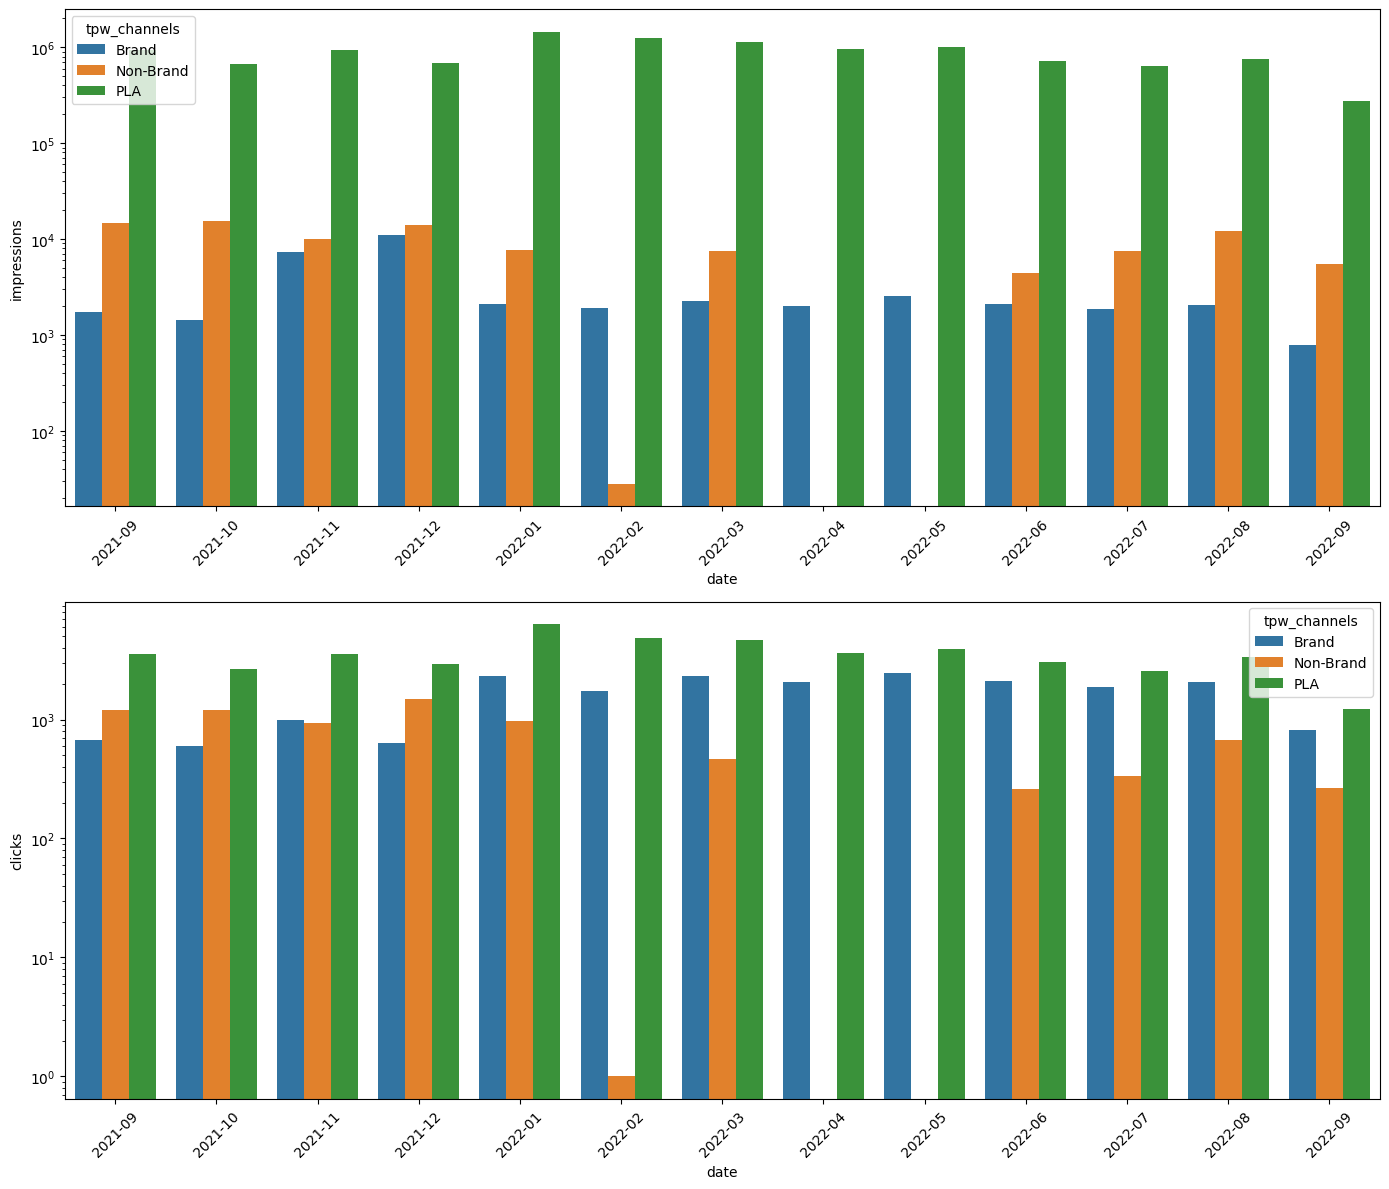

In [325]:
fig, axes = plt.subplots(2, 1, figsize=(14, 12))

hist_data = marketing_data_df[(marketing_data_df['country']=='FR')&(marketing_data_df['date']>='2021-09-01')].copy()
hist_data['date'] = pd.to_datetime(hist_data['date'])
hist_data['date'] = hist_data['date'].dt.to_period('M')

sns.barplot(data=hist_data,
            x='date',
            y='impressions',
            hue='tpw_channels',
            ax=axes[0])

sns.barplot(data=hist_data,
            x='date',
            y='clicks',
            hue='tpw_channels',
            ax=axes[1])

for ax in axes.flat:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    ax.set_yscale('log')

plt.yscale('log')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

We see throughout the period, Non-Brand and PLA numbers follow the same trends, we one increases then other increases as well. However, at the start of 2022 we see Brand impressions decrease but Brand clicks increase. An explanation of this may be due an error in counting impressions, specifically recording clicks as impressions and vice versa. This would result in more realistic metrics and behaviours. Further investigation would have to be conducted to validate this claim however.

### Recent Trends (3-6 months)

We will now investigate any recent trends that have appeared, specifically analysis any trends that emerge for after 2022-03-01. We will present this data along with the rest of 2022's data to give us context for any changes we observe. Her we load in the data for each channel and the combines channel data for the required period.

In [334]:
recent_marketing_data_df = marketing_data_df[marketing_data_df['date']>='2022-01-01']
recent_all_channels_marketing_data_df = all_channels_marketing_data_df[all_channels_marketing_data_df['date']>='2022-01-01']

First, we will observe any trends emerging for the data regarding the combined channels, Brand, Non-Brand and PLA. 

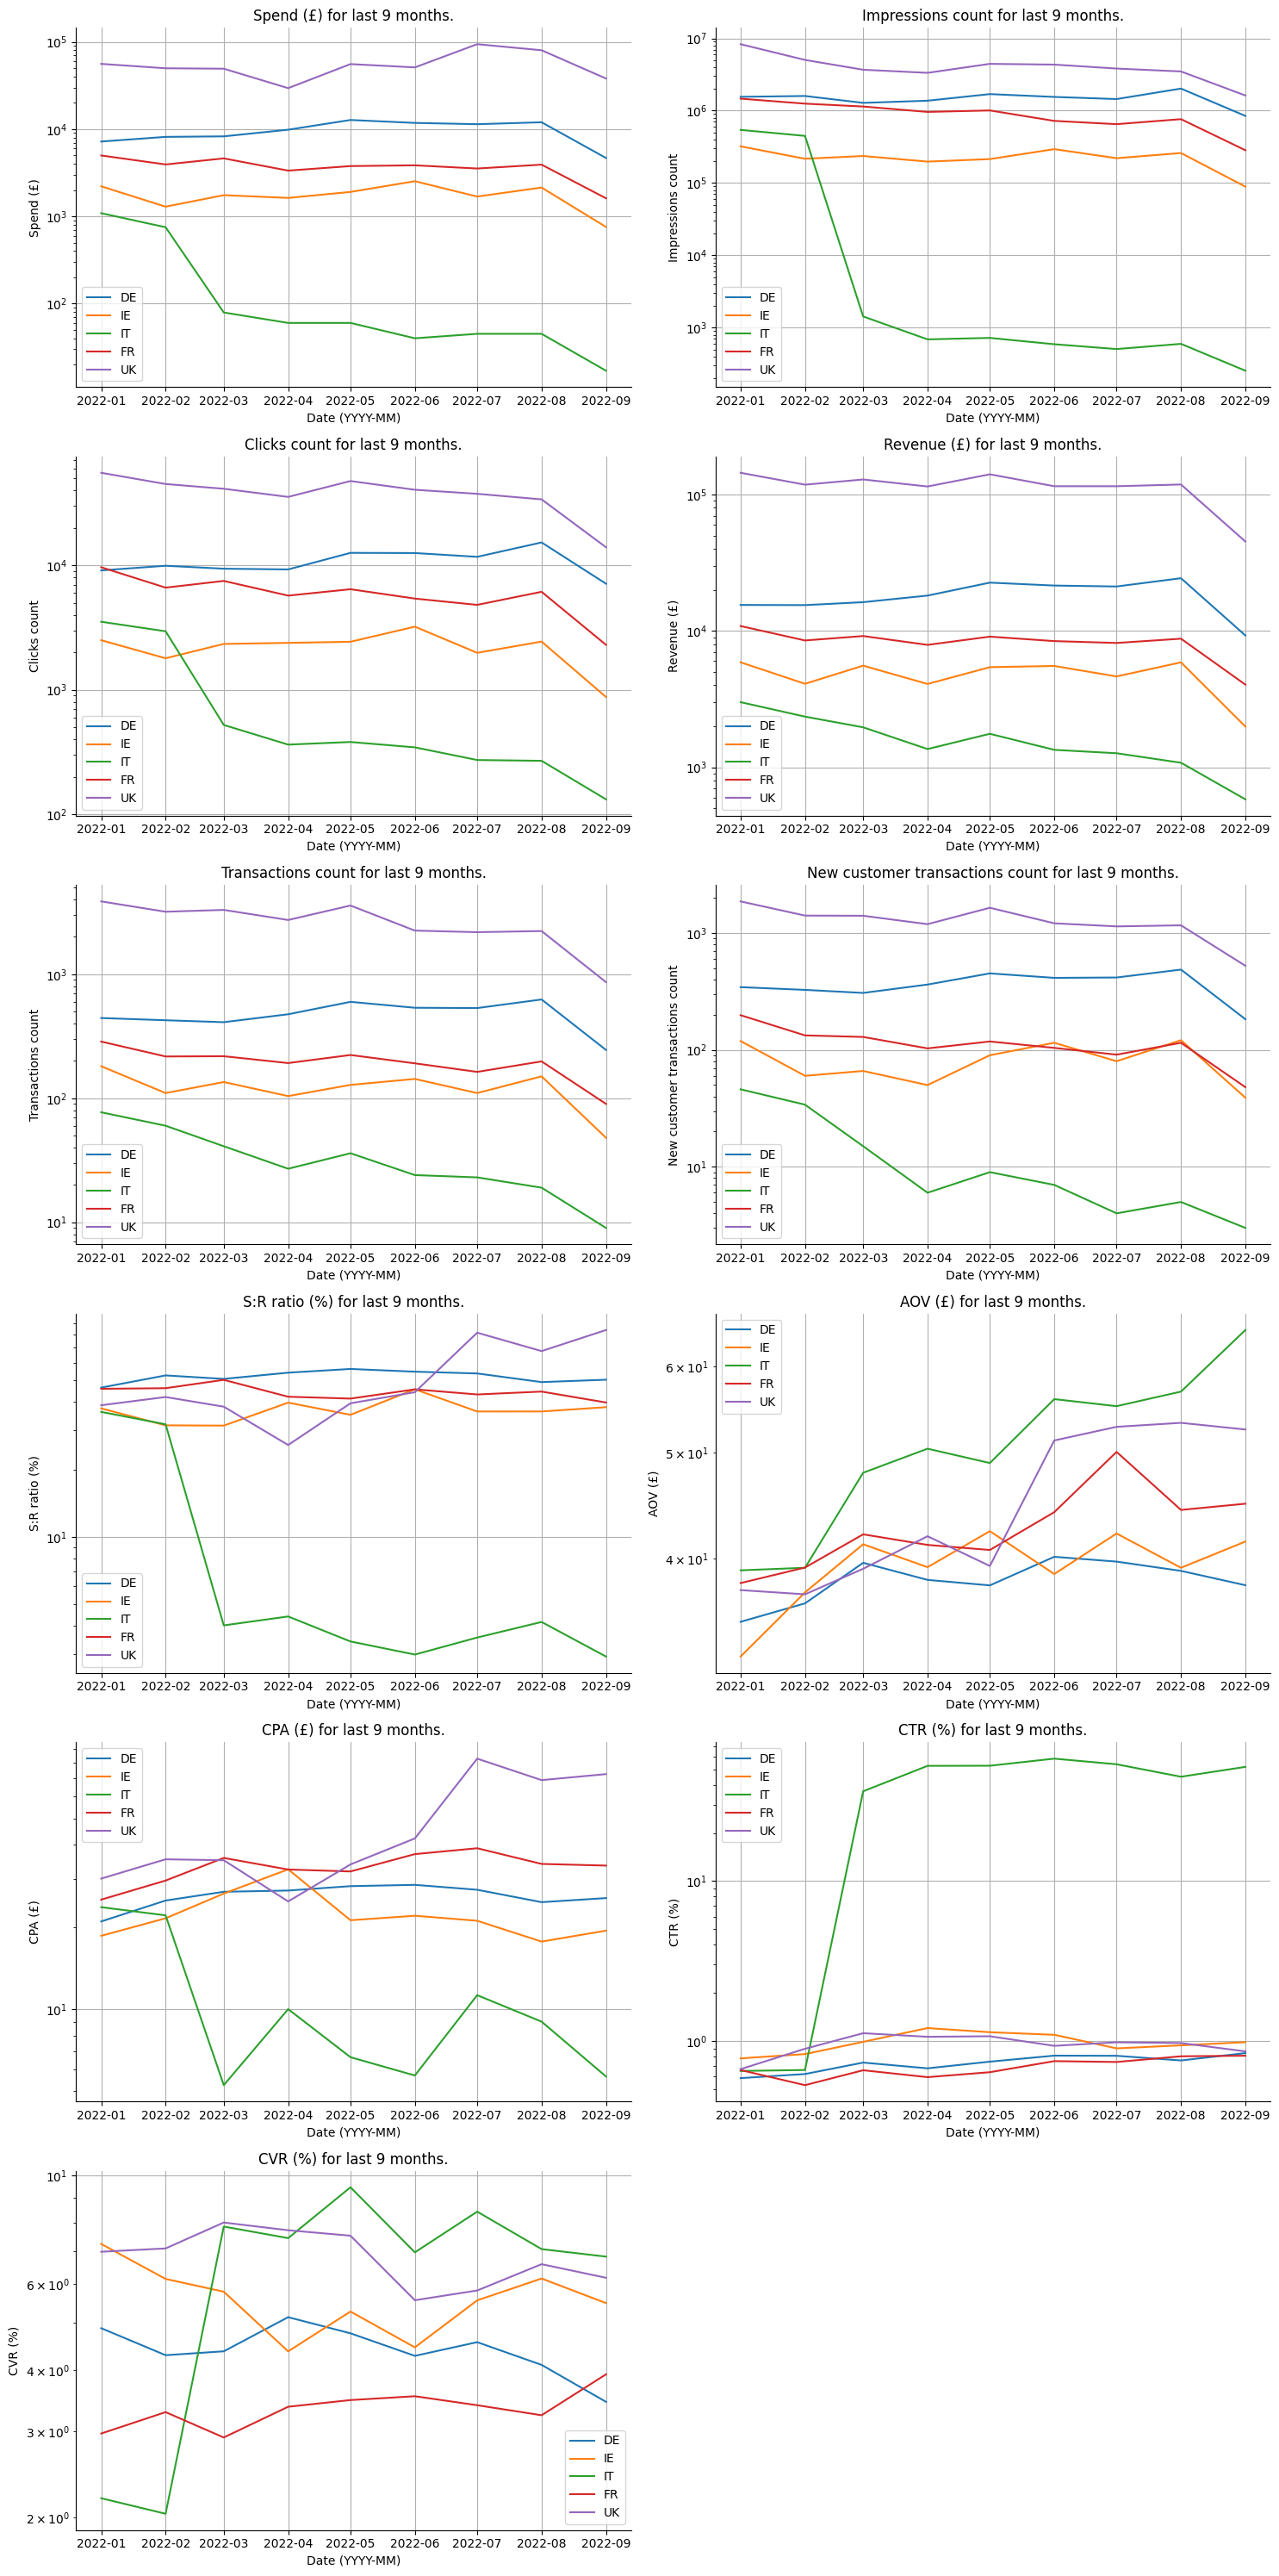

In [335]:
def recent_trends(df):
    fig, axes = plt.subplots(6, 2, figsize=(15, 30))
    axes = axes.flatten()
    feature_list=['spend','impressions','clicks','revenue','transactions','new_customer_transactions','spend_revenue_ratio','average_order_value','cost_per_acquisition','click_through_rate','conversion_rate']
    y_axis_labels = {
        'spend': 'Spend (£)',
        'impressions': 'Impressions count',
        'clicks': 'Clicks count',
        'revenue': 'Revenue (£)',
        'transactions': 'Transactions count',
        'new_customer_transactions': 'New customer transactions count',
        'spend_revenue_ratio': "S:R ratio (%)",
        'average_order_value': 'AOV (£)',
        'cost_per_acquisition': 'CPA (£)',
        'click_through_rate': 'CTR (%)',
        'conversion_rate': 'CVR (%)'
    }
    for ax, feature in zip(axes,feature_list):
        for country in ['DE','IE','IT','FR','UK']:
            sns.lineplot(data=df[df['country']==country],
                    x='date',
                    y=df[df['country']==country][feature] + 0.001, #work around for 0's on log scale plots
                    ax=ax,
                    ci=False,
                    label=country)
        ax.set_title(f'{y_axis_labels[feature]} for last 9 months.')
        ax.set_xlabel('Date (YYYY-MM)')
        ax.set_ylabel(y_axis_labels[feature])
        ax.set_yscale('log')
        ax.spines[['right', 'top']].set_visible(False)
        ax.grid(True)
    fig.delaxes(axes[-1])
    plt.tight_layout()
    plt.show()
    return

recent_trends(recent_all_channels_marketing_data_df)

Observations of note for the data across all channels;

- Last month of data for spend, impressions, clicks, revenue, transactions and new customer transactions declines for every country at roughly a shared rate.

- S:R ratio fluctuates but remains stable, except for the UK which sees a monotonic increase from 2022-04. Italy maintains a very low S:R for the final 6 months with it around $\sim$ 3-4%, where others maintain roughly 40%. This lower S:R is due to decreased spending.

- AOV either constant with fluctuation or increases towards end of the observation period. Italy unusually high by the September but low transaction counts inflates this statistic making it unreliable to use.

- CPA relatively stable within increase in UK. This increased CPA is due to increased spending without time for latency period to catch up with more new customers.

- CTR stable across countrys, except Italy's CTR is extremely high at $\sim$ 0.5%. This is most likely due to a much smaller sample size of data to calculate this metric and a relatively much steeper decline in the number of impressions compared with the number of clicks in the prior month.

- CVR relatively stable for the final 6 months. We see a big spike in Italy before the last 6 months which is again most likely due to a sharper drop in the number of clicks compared with the decline in the number of transactions for the previous month.

We will now move onto channel specific trand observations, starting with Brand channels.

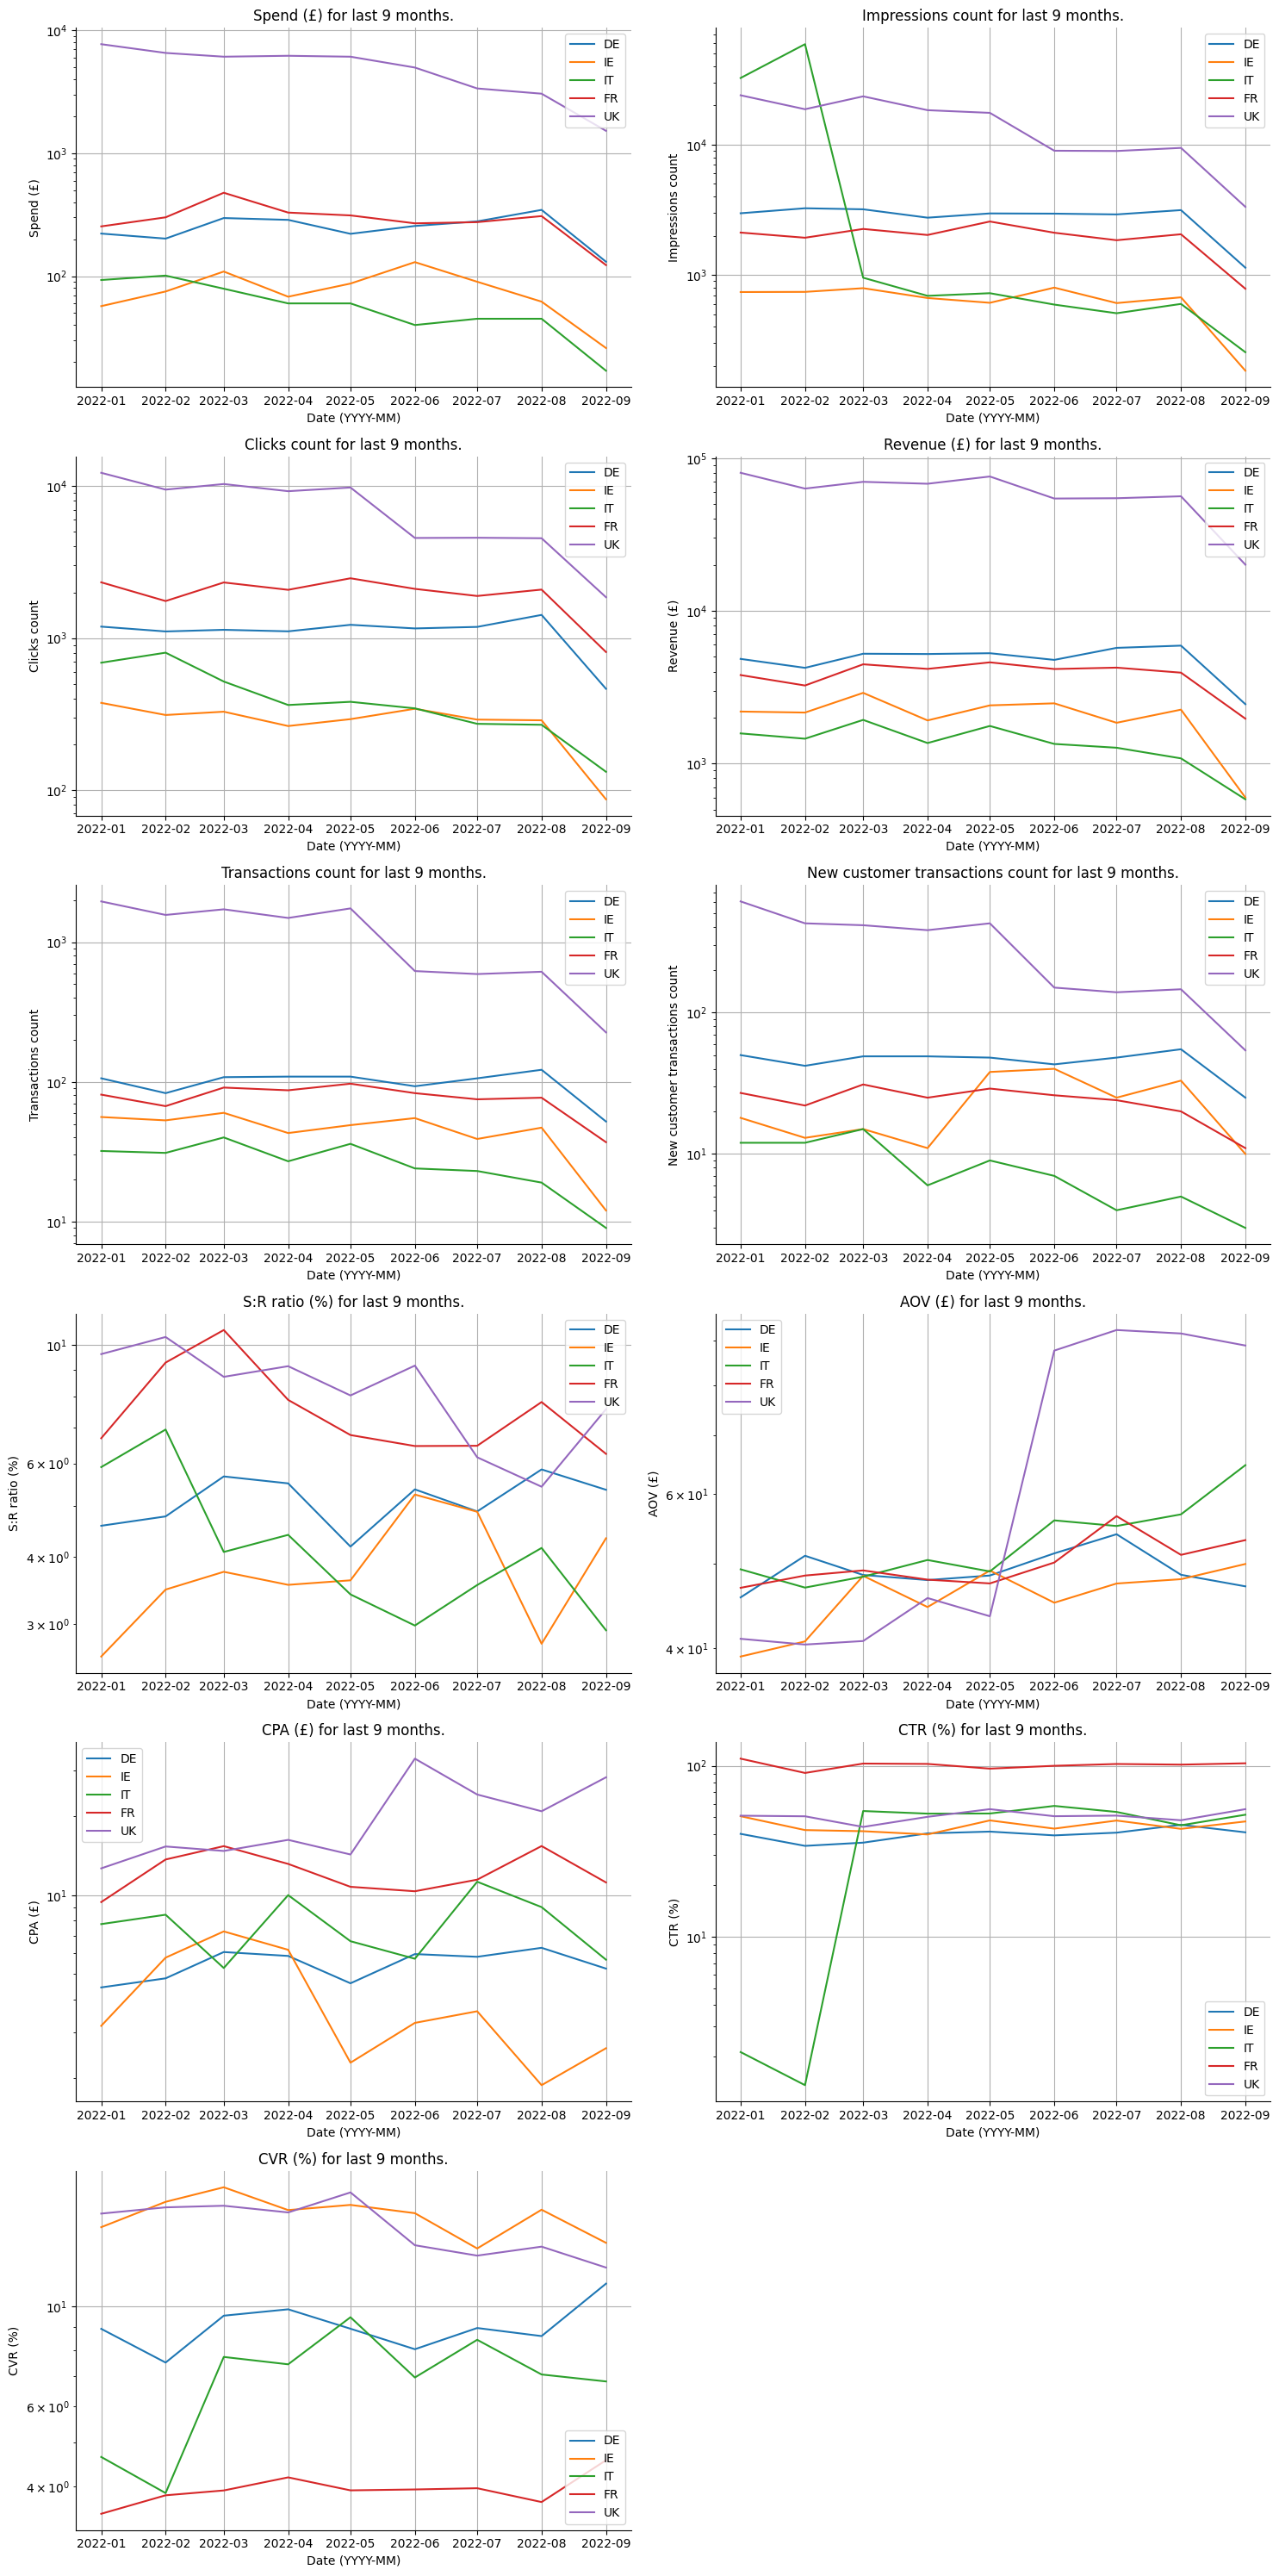

In [336]:
recent_trends(recent_marketing_data_df[recent_marketing_data_df['tpw_channels']=='Brand'])

Observations of note for the data from Brand channels;

- Noticeably decline in the final month, as seen in across all channels, for spend, impressions, clicks, revenue, transactions and new customer transactions.

- Ireland sees significant increase in new customer transactions, to the point that most transactions by the end of the data period are from new customers.

- Italy, France and UK decline in S:R, with Ireland and Germany overall constant. All heavily fluctuating.

- AOV stead increase throughout period for all countries, with UK having a spike during the May/June time to reach a steady value of almost double the rest.

- CPA steady for Italy, France and Germany with fluctuations, UK sees increase due to higher relative decline in new customer transactions compared with spending decline, and slight decline in Ireland due to withdrawal of spending.

- We see an unusually high CTR for France at $\sim$ 10% compared with the rest of the countries. This is caused by the anomalous data we noted previously that we are unable to account for at present.

- For CVR, we observe three distinct groupings, with Ireland and UK on top at $\sim$ 18% showing slight decline, Italy and Germany similar at $\sim$ 10% both increasing before the final 6 months with Germany increasing in the final month, and France steady at the bottom at $\sim$ 4% with increase in the final month.

Next we will look at the Non-Brand channels;

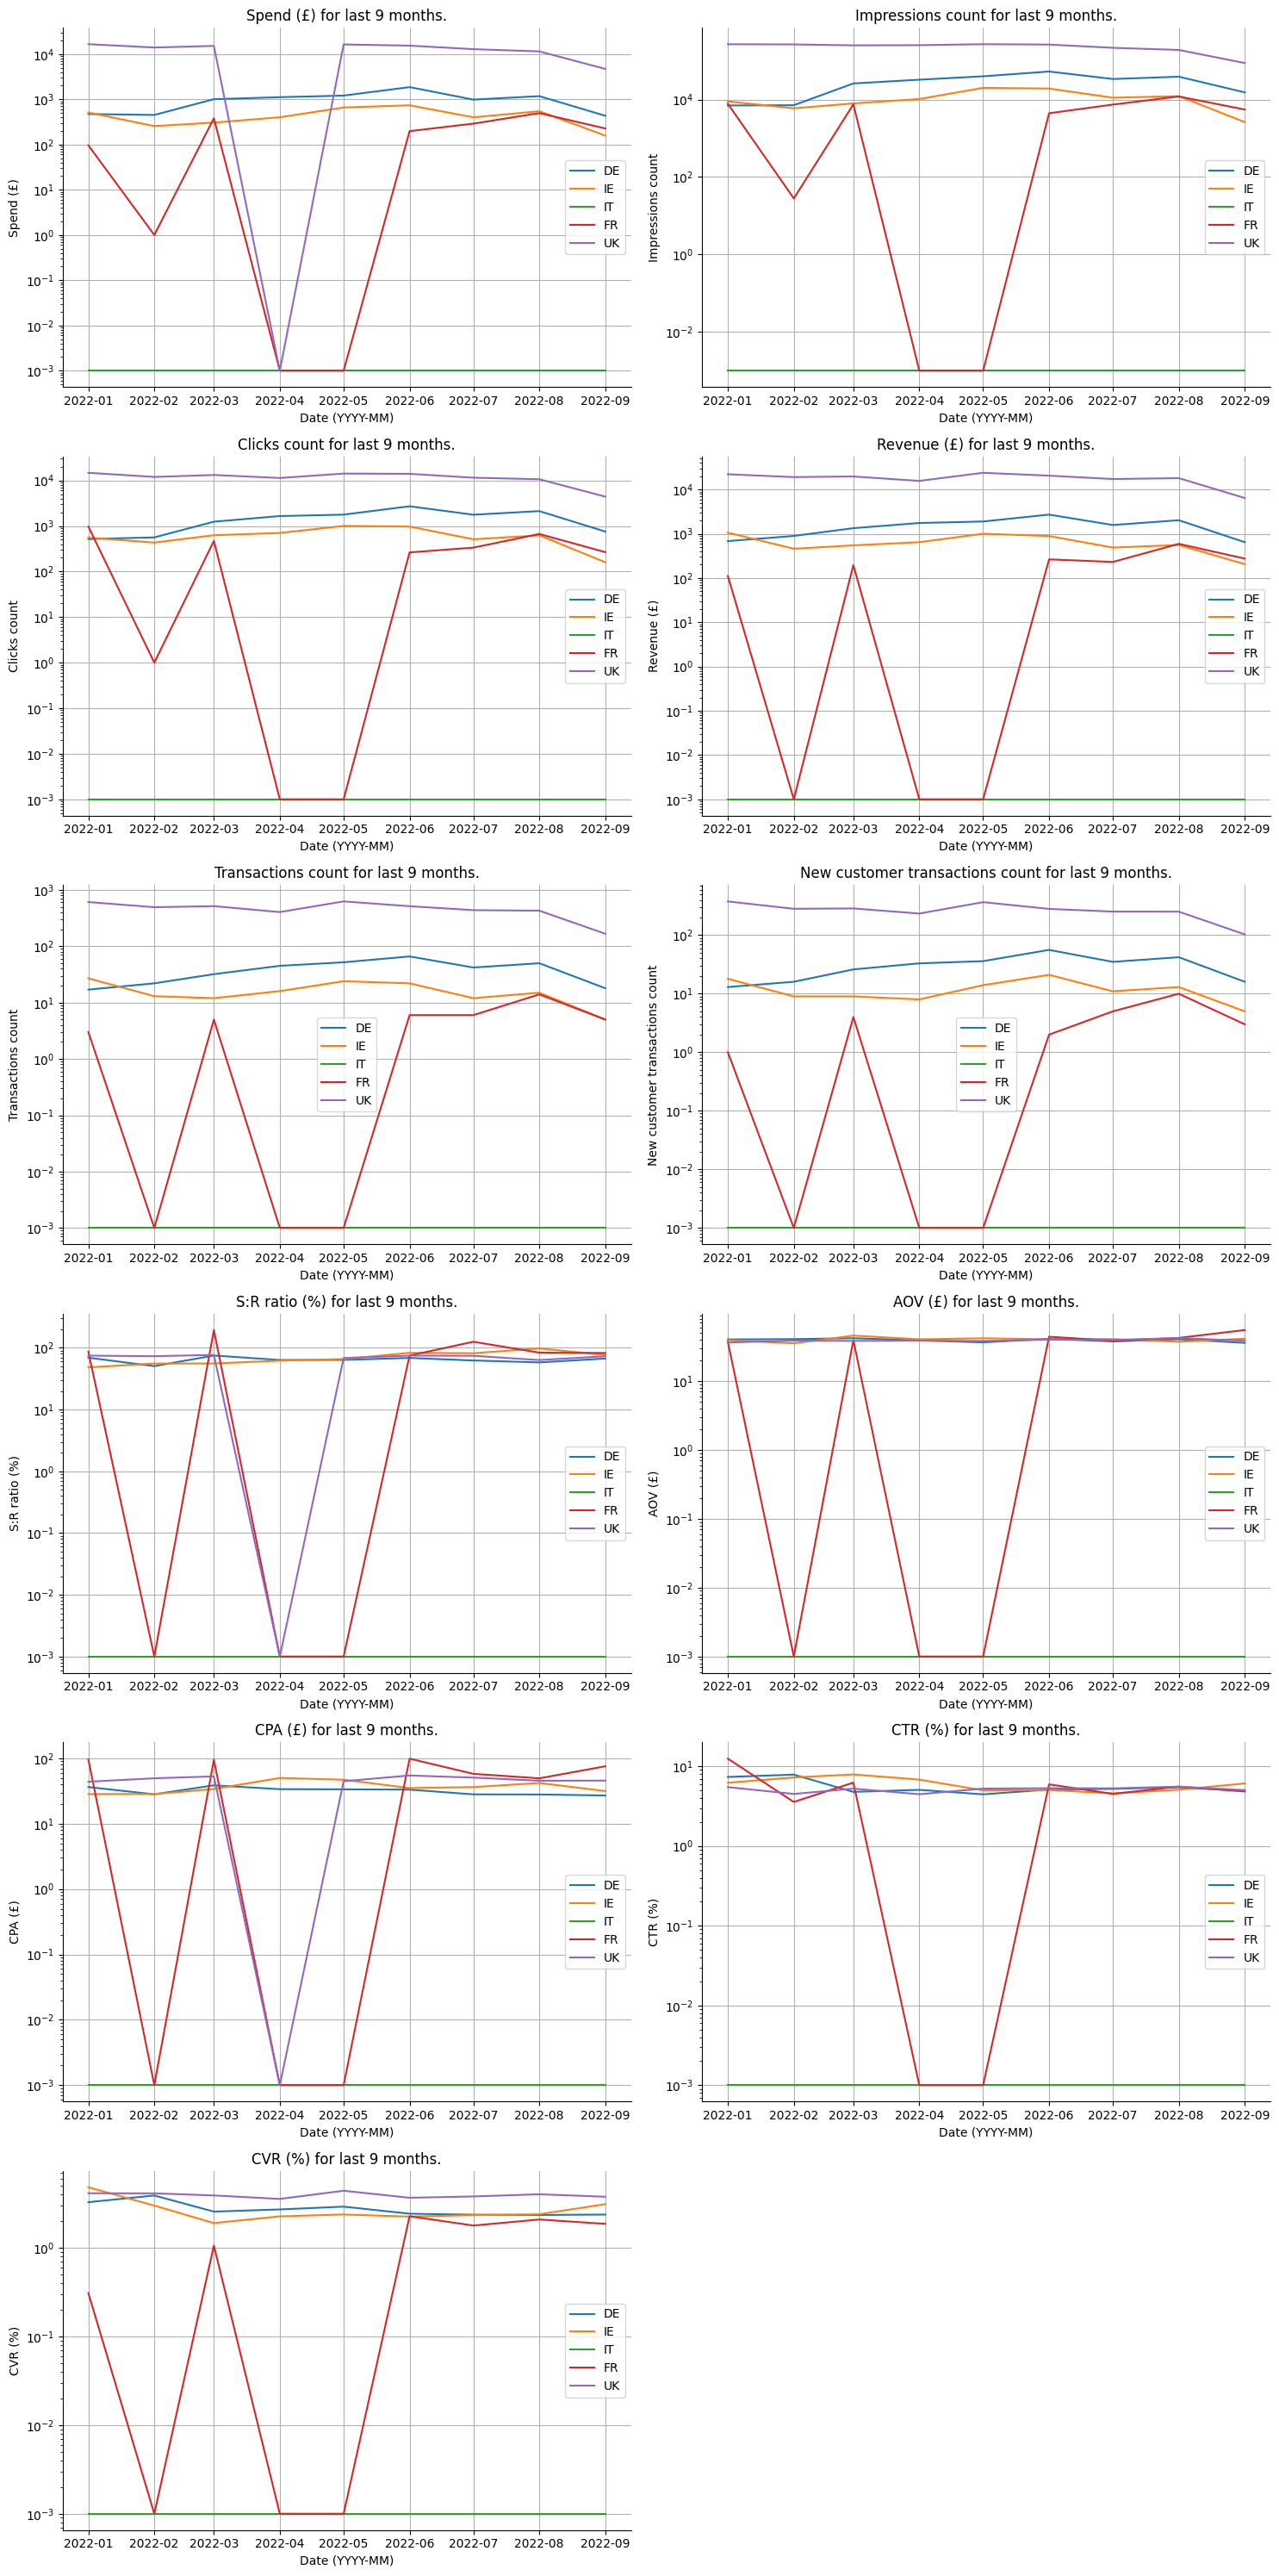

In [337]:
recent_trends(recent_marketing_data_df[recent_marketing_data_df['tpw_channels']=='Non-Brand'])

Observations of note for the data for Non-Brand channels;

- We see no activity from Italy across the final 6 months for any feature.

- Under the assumption that the lack of value with these features, we see zero activity from France for 2 months.

- We observe zero spend in the UK for a single month. This is more suspicious than the other records with zero values due to a lack of responce for related data, such as impressions, clicks, etc. We will assume this record is anomalous and assume no drastic change in the trend for this period occurred.

- We again observe a decline in the starting features in the final month.

- Rest of the data remains relatively stable across all countries.

Finally, we will look at data regarding PLA channels.

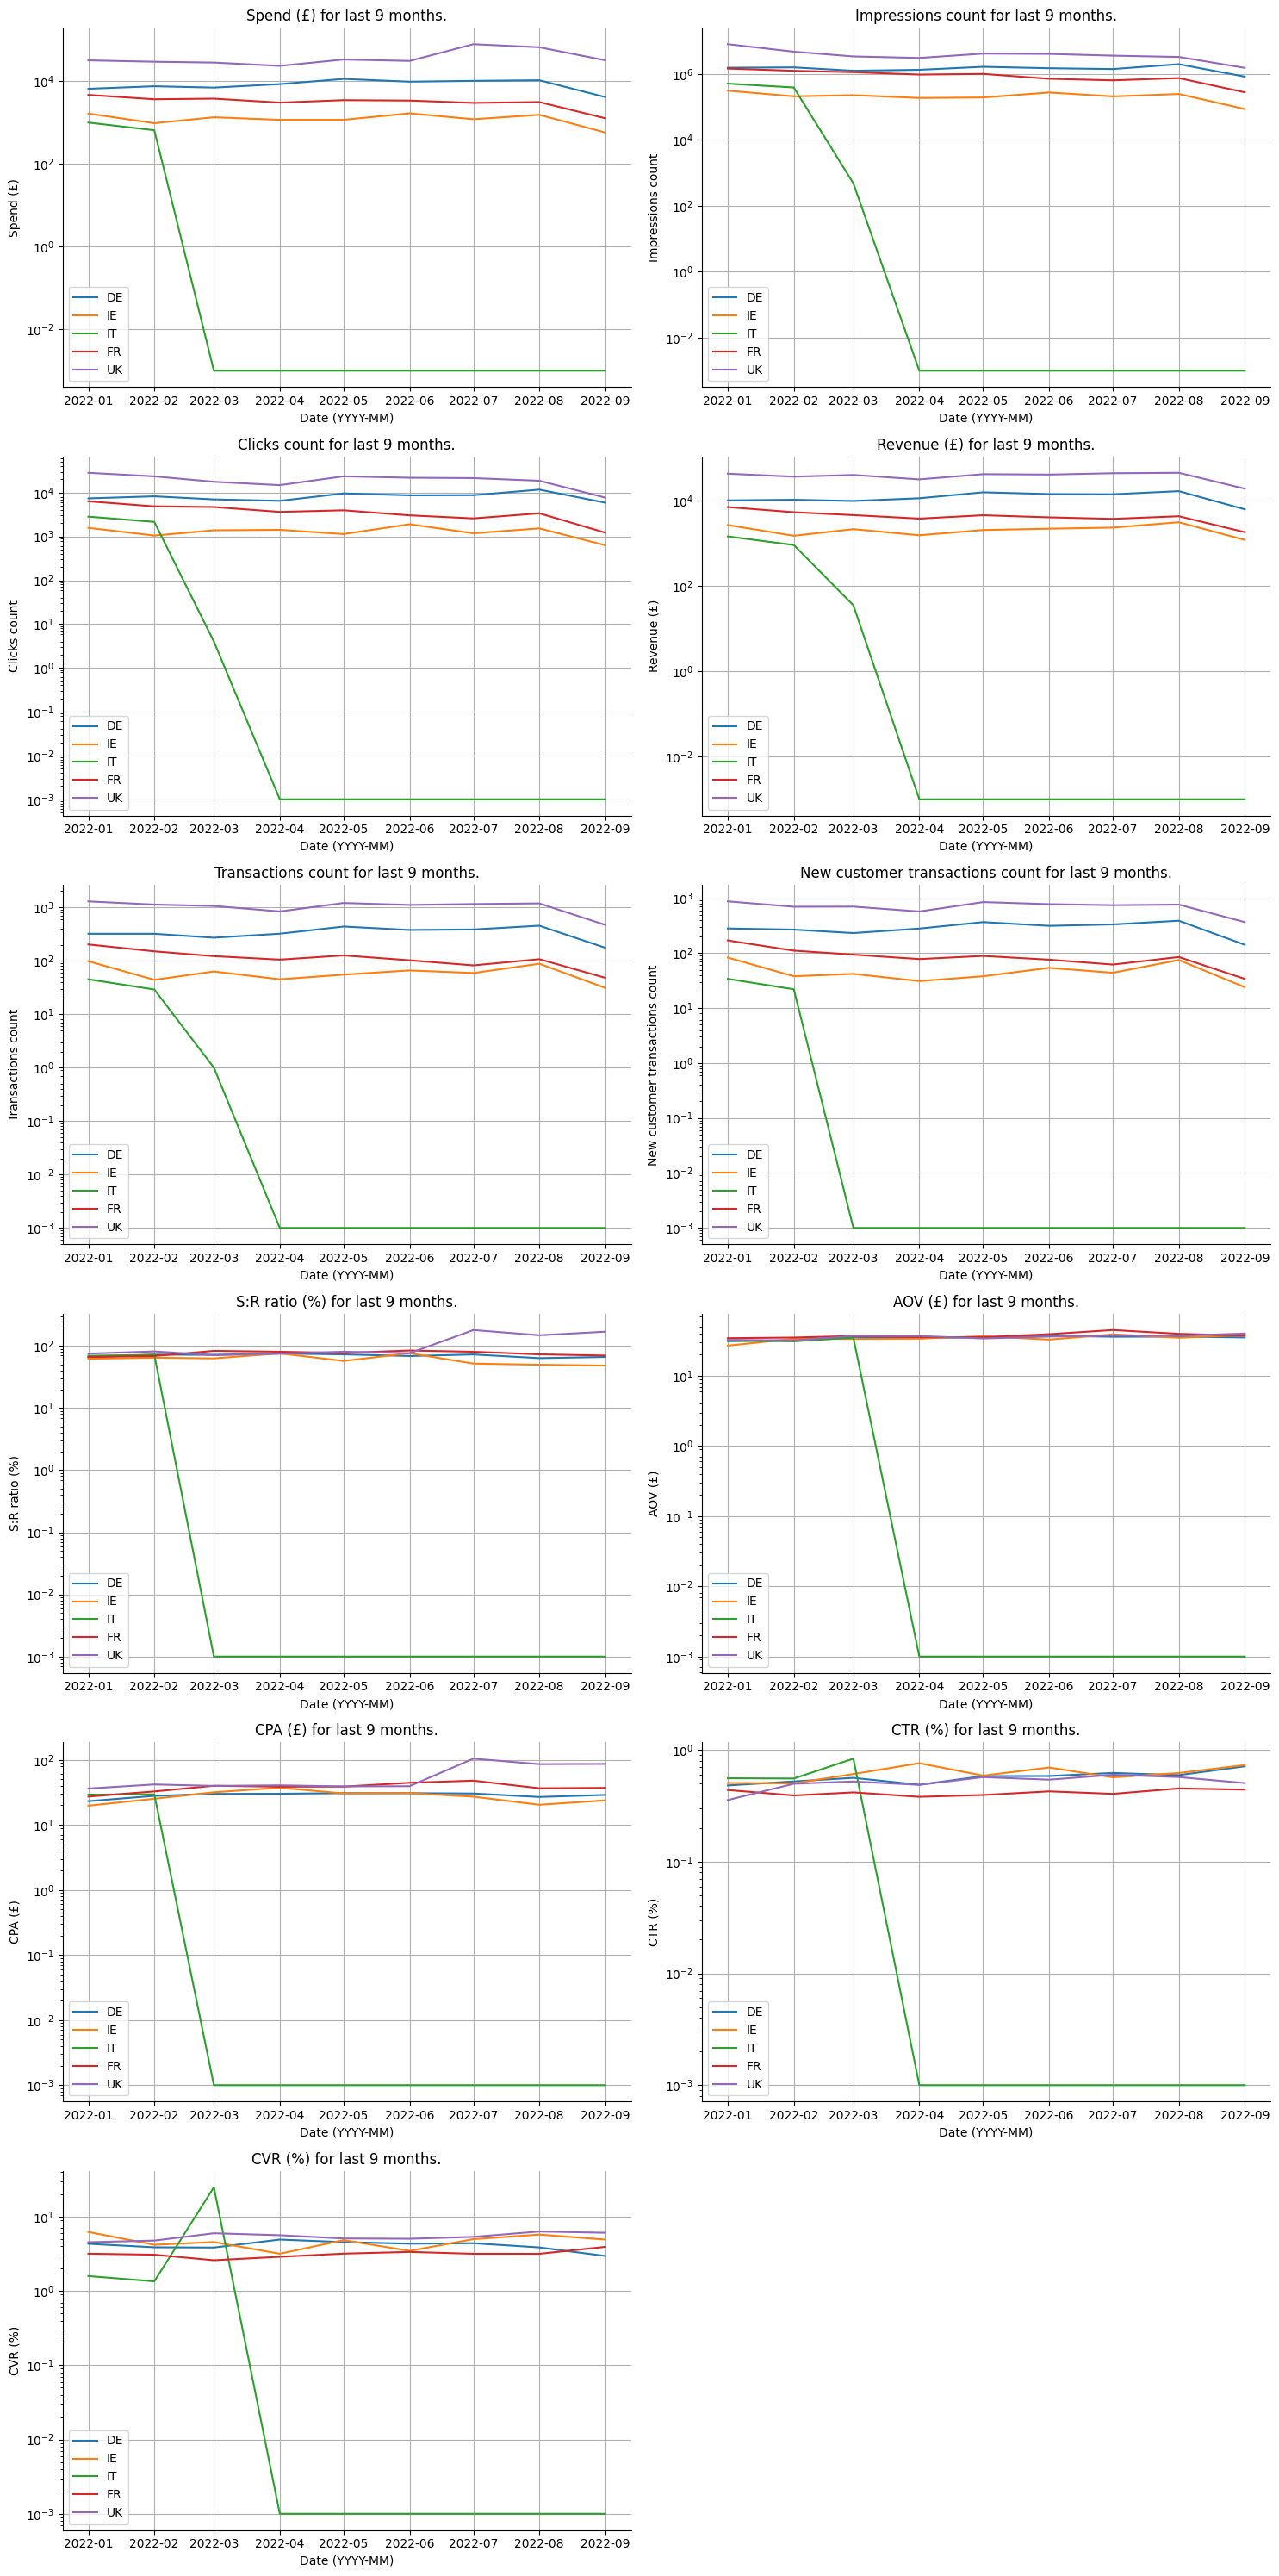

In [338]:
recent_trends(recent_marketing_data_df[recent_marketing_data_df['tpw_channels']=='PLA'])

Observations of note for the data for PLA channels;

- We see zero spend but see other features non-zero during that time at the start of the year. This phenomena can be explained as an instance of lag from the spending cut with ads still being present after spending cuts. For a short period afterwards would still generate impressions (though not as much as we would expect) for that month. This would explain what we see.

- We observe a spending increase towards the end of the period, which is reflected in the relevent metrics, S:R and CPA. This increase does not result in corresponding increases in impressions and reveneue. This results in an increase in the S:R by the end of the period.

- Rest of the data remains relatively consistant with minor fluctuations.

## **Task 3** (Trading Data Visualisation)

This next task requires the analysis of the trading data and detail why the use of the arithmetic mean can be problematic. First we will view the data itself.

In [24]:
display(trading_data_df.head())

,unit_sale_price_gbp
0,11.050291
1,24.606605
2,26.305537
3,17.347053
4,27.204231


After loading in the data, we can view verious summary statistics of it, including the mean.

In [10]:
meta_data = trading_data_df.describe()
display(meta_data)

trading_data_mean = meta_data.loc['mean'][0]
print(f'The mean of the trading data is:\n\n£ {trading_data_mean}')

,unit_sale_price_gbp
count,3000.000000
mean,12.550069
std,11.324887
min,0.053101
25%,3.287028
50%,10.002398
75%,18.809066
max,70.573497


The mean of the trading data is:

£ 12.550068731936694


With a mean of roughly £12.55, we can plot the data alongside this to see how useful this statistic is at understanding the data.

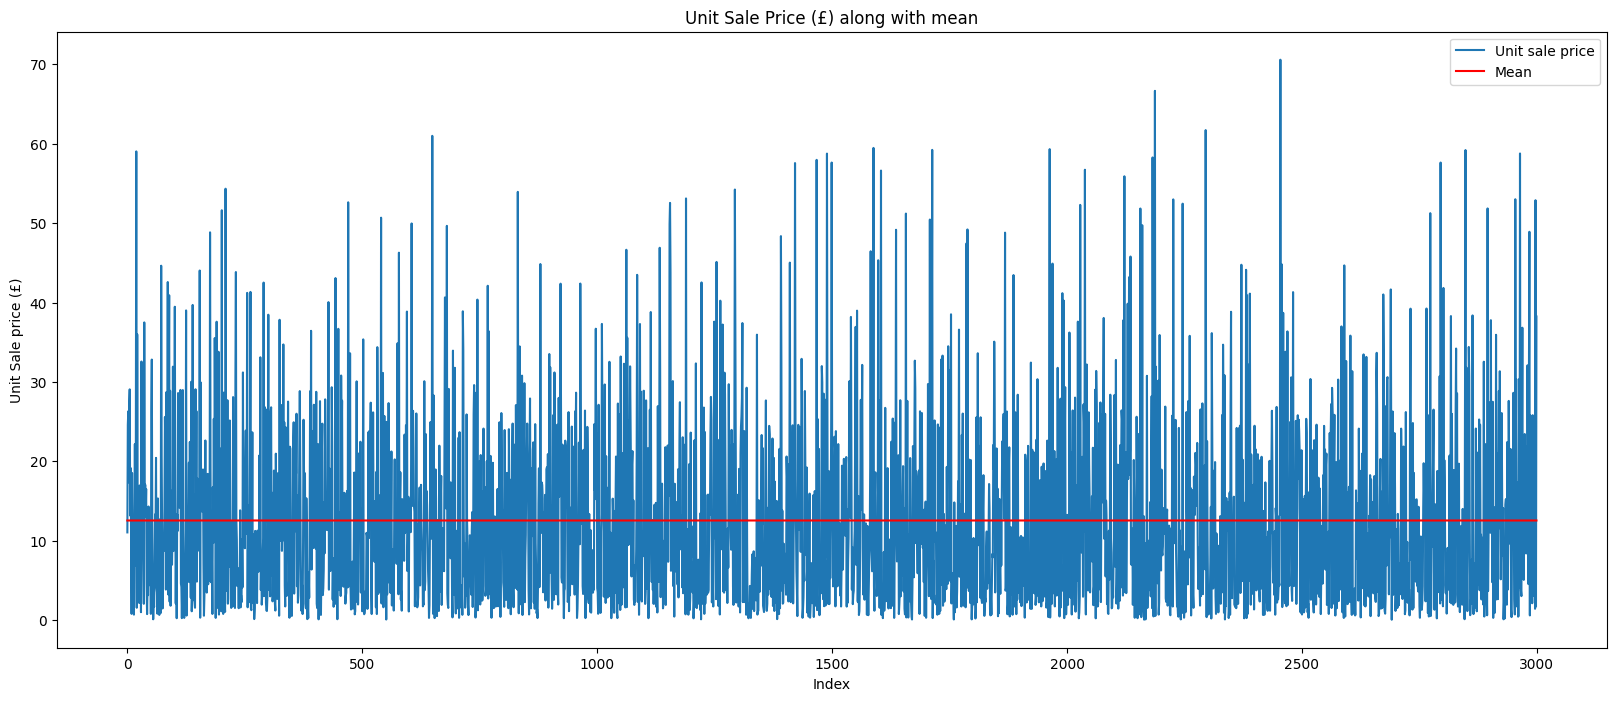

In [74]:
plt.figure(figsize=(20, 8))
sns.lineplot(data=trading_data_df,x=trading_data_df.index,y=trading_data_df['unit_sale_price_gbp'],label='Unit sale price')
mean_plot = [trading_data_df['unit_sale_price_gbp'].mean()]*len(trading_data_df)
sns.lineplot(data=trading_data_df,x=trading_data_df.index,y=mean_plot,label='Mean',color='red')
plt.xlabel('Index')
plt.ylabel('Unit Sale price (£)') 
plt.title('Unit Sale Price (£) along with mean')
plt.legend()
plt.show()

We see that the data itself is very erratic, resembling a stochastic process with it's random nature. With this in mind, perhaps viewing the distribution of the data would yield some more insight as to the problems of using the mean. We can view this data using a Box-and-whiskers plot to gain an understanding of the distribution and various metrics, such as it's mean and IQR.

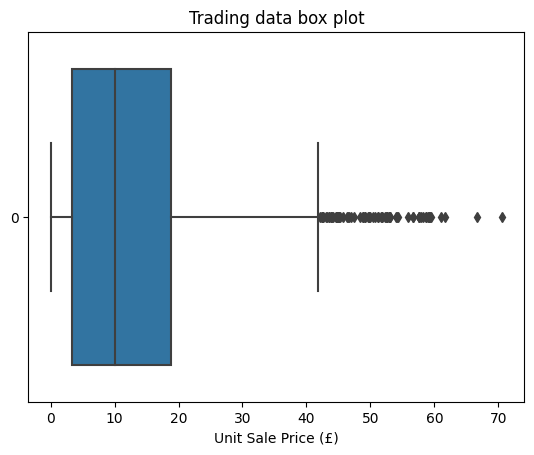

In [81]:
ax = sns.boxplot(data=trading_data_df['unit_sale_price_gbp'],orient = 'h')
plt.title('Trading data box plot')
plt.xlabel('Unit Sale Price (£)')
plt.ylabel('')
plt.show()

This plot gives us an idea about the distibution, specifically about it's structure as it appears to be skewed to left towards 0. We can view this distribution clearer with a histogram plot.

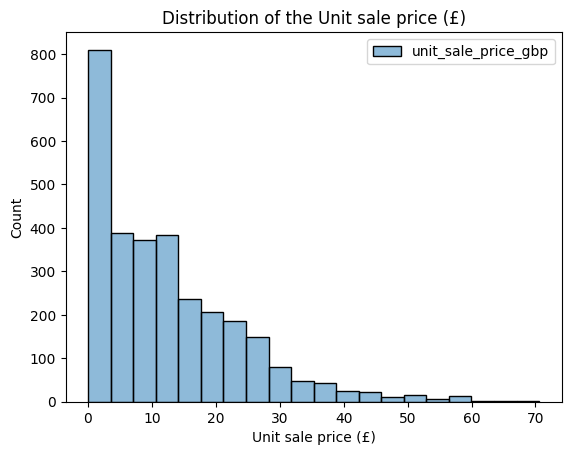

In [42]:
sns.histplot(trading_data_df, bins=20, kde=False)
plt.xlabel('Unit sale price (£)')
plt.title('Distribution of the Unit sale price (£)')
plt.show()

As we can see, the data looks to not be draw from a normal distribution. Instead, it appears to follow a log-normal or an exponential distribution, with the data heavily skewed towards 0. With this, we can now start to explain why using the average of this data would be problematic or misleading. But first, we will measure the effectiveness of the mean as a representative of the data.

In [31]:
df = abs(trading_data_df['unit_sale_price_gbp'] - trading_data_mean)
error_of_mean = sum(df)/len(df)
print(f'The average error of the arithmetic mean of the trading data is:\n\n{error_of_mean}')

The average error of the arithmetic mean of the trading data is:

8.802017354929268


We see that the average difference from the mean and the data points is around £8.80, which for a mean of £12.55, leaves a big interval for inaccuracy.

1. Due to the skewed nature of the data's distribution, the mean does not give a fair description of the centrality of the data. As the data is skewed towards smaller numbers, the mean becomes easily influenced by larger data points and thus will shift towards them and away from the majority of the data. We can see this by calculating the amount of data to the left and right of the mean. From this data we will see that the majority of the data will be located to the right of the mean. Indeed,

In [38]:
less_than_mean, greater_than_mean = len(trading_data_df[trading_data_df['unit_sale_price_gbp'] < trading_data_mean]), len(trading_data_df[trading_data_df['unit_sale_price_gbp'] > trading_data_mean])
print(f'The count of data points less than the mean: {less_than_mean}.')
print(f'The count of data points greater than the mean: {greater_than_mean}.')

The count of data points less than the mean: 1782.
The count of data points greater than the mean: 1218.


2. The mean becomes less robust when used to describe a exponential-like distribution as it is very sensitive to extreme outliers away from the rest of the data. Data points with large magnitutde heavily influence the mean and thus only a few of these values can drastically influence the integrety of the arithmetic mean.

This is why the use of other summary statistics are more useful when dealling with exponential distributions, such as the median and the IQR. These statistics are not influenced by few outliers and therefore are more robust than the mean. We will assess the usefulness of the median in our example data.

In [73]:
trading_data_median = trading_data_df.median()[0]
print(f'The median of the trading data is:\n\n£ {trading_data_median}\n')

df = abs(trading_data_df['unit_sale_price_gbp'] - trading_data_median)
error_of_mean = sum(df)/len(df)
print(f'The average error of the median of the trading data is:\n\n{error_of_mean}')

The median of the trading data is:

£ 10.002398098099004

The average error of the median of the trading data is:

8.53370319074902


The difference between the arithmetic mean and the median is a whole £2.50 decrease, as it is not being influenced by outliers with large magnitudes. We also see that the absolute error used to approximate unit sale prices also derceases as a result of this decreased value.

## Report Summary
 
This report analysis marketing data from Protein Works from 2021-01 to 2022-09. The marketing dataset contained 9 fields, date, country, tpw_channels, spend, impressions, clicks, revenue, transactions and new_customer_transactions. Before data cleansing, we evaluated the following metrics;

- **S:R** : The Spend-to-Revenue ratio, in the form of a percentage.
- **AOV** : The Average Order Value, the average revenue generated for each transaction.
- **CPA** : The Cost per Acquisition, the amount spent for each new customer.
- **CTR** : The Click-Through-Rate, the percentage of people who saw our ads and clicked on it.
- **CVR** : The Conversion Rate, the percentage of people how clicked on our ads who went on to make a transaction.

Which these metrics defined, we evaluated them on the uncleaned data,

|Metric|Value|
|-|-|
|S:R| 42.52% |
|AOV| £39.82 |
|CPA| £33.09 |
|CTR| 0.79% |
|CVR| 5.77% |

After data cleaning, we re-evaluated these metrics;

|Metric|Value|
|-|-|
|S:R|42.57%|
|AOV|£39.77|
|CPA|£33.45|
|CTR|0.8%|
|CVR|5.73%|

During the cleaning process, a set of $\textit{'rules'}$ were established that our data had to adhere to inorder to make sense. These rules were;

1. spend, impressions, clicks, revenue, transactions and new customer transactions $\geq$ 0.
    
    This statement ensures that we don't get negative values for discrete veriables and fields containing currency data.

2. impressions $\geq$ clicks.

    This statement ensures that we don't get records with more clicks than impressions, as you cannot click on an ad without viewing it first.

3. transactions $\geq$ new customer transactions.

    Since the transactions field contains the total number of transactions, it also includes new customer transactions, thus must be grater or equal to that.

4. If transactions = 0, then new customer transactions = 0.

    This rule is a special case for the previous statement.

5. If impressions, clicks and transactions = 0, then revenue = 0.

    This ensures that if no activity occurs for the business, then no revenue will be generated from nothing.

These rules we used to detect anomalous data within the marketing dataset. Once detected, we either corrected any mistakes, with justification, or left any anomalous data if we were unable to replace it with any justifications. This was the case when analysing France's Brand data which showed several records with clicks exceeding the number of impressions. Since we were unable to deduce with any reasonable margin of error what the impression count was, we left the anomalous data alone but kept note of it's existance for further use if required in the future tasks.

Other potentially anomalous data was discovered later on in the report which was not detected through our rule-based approach. These records were not considered normal through the rules, but when considered in context of the data seemed to be anomalous. However, without any access to the data gathering process and with no communication with senior members of marketing, I'm unable to determine whether these records are indeed accurate or not.

Next, we were tasked with improving the efficiency of the S:R ratio for the company. If our S:R is greater than 100%, it means that company is returning less revenue than what is being spent to generate it, ie is generating a loss in profits. Since the S:R ratio measures what percentage of the revenue generated was spent to initial generate it, an efficient company will have a lower S:R as revenue generated required a smaller proportion of spending to achieve it. We can achieve this in two ways;

1. Maintain revenue, while reducing spending.

2. Maintain spending, while increasing revenue.

3. Reduce spending, while increasing revenue.

While the 3rd option is obviously the most desirable, it is also the most unrealistic to achieve. Instead, we will focus on achieving a lower S:R via options 1 and 2.

In order to target where the company needs to improve in order to lower the S:R overall, we will analyse each country's influence on the total and discuss possible actions to be taken. Comparing data from each country, comparing their monthly S:R against their monthly profits, we could define four groups that would help us indentify where improvement could be made. We defined $\textit{priority targets}$ using the 2 aforementioned metrics, S:R and profit, in the following way;

||Low Profit|High Profit|
|-|-|-|
|**High S:R**|Lowest Priority (Improve S:R and Profits)|High Priority (Improve S:R)|
|**Low S:R**|Medium Priority (Improve Profits)|Desired Region|

For this report, we will only analysis countries that fall within the High Priority (countries who typically have high S:R and high profits). Using the calculated overall S:R as a measure of a high or low S:R, we find that Germany and the UK are both high priority targets for improvement.

For the UK, we observe that monthly S:R remains stable but spikes near the end of the period. We find that this is a consequence of increased spending without time for a response from the market in the form of increased impressions which would eventually lead to increased revenue. Thus, no action is required yet, only after a period of time that we can rule out any lag from the market and conclude the marketing strategy failed.

For Germany, we concluded that a slower rate of return from increased spending, compared with a previously observed case, was responsible for Germany's increased S:R towards the end of the data's time interval. Upon further investigation into spending allocation, we find that spending was put into PLA channels. This resulted in a slower return compared with when spending was pushed more into Non-Brand channels. Therefore, I propose that funding be pushed back into Non-Brand channels in the future to ensure a more rapid return in invested, and reduce the S:R back below our defined threshold level quicker to improve overall efficiency in the company.

Next, analysis was conducted on the engagement improvements in France. We defined the $\textit{engagement}$ from a country by using the CTR metric. We see that for overall CTR in France, engagement in adverts declines, but then increases throughout 2022 with fluctuations. We have found the engagement increase we desire, so we next analysed the engagement per channel to understand which channel/s is responsible for this increasing trend. After vicualising each channel's monthly CTR, we find that Brand channel shows unusual trends which explain this increase. We observed a rapid drop in the CTR for Q4 of 2021, then a rapid increase to over 100% the next month and the remaining around 100% for the rest of the year of 2022. This data is the anomalous data we previously detected that we did not change due to lack of knowledge regarding the gathering of the data. After further investigation, we note that this trend was caused by simultaneous increase in clicks and decrease in impressions, resulting in the features remaining roughly the same for the rest of the year. I concluded that a potential error arose from the data gathering process at this time which resulted in this unusual trend. Therefore, we can state that the engagement improvement we observe in France is a consequence of this error and will need to be corrected in order to state if engagement has actually improved for this period.

The final analysis regarding the marketing data involved observing potential trends within the final 3-6 months. The overall trends for each country remained relatviely similar between Germany, Ireland, France and the UK, with constant values with fluctuations and decline in the final month of observations. However we see Italy produce more drastic decline overall for the original features, mostly likely due to a major reduction in spend. This results in a smaller sample size for customer interactions, and thus a more erratic metric evaluations for Italy.

For Brand channels; we observe very little growth for each country across the final 6 months. The UK produces a big spike in the AOV due to a sudden decline in transactions. Near the end of observational time, Ireland's majority of transactions were made by new customers. France's CTR is much higher compared to the other countries, due to the anomalous data we were unable to replace or correct.

For Non-Brand channels; Italy has no activity during the final 6 months. We see irregular periods of zero records from France and the UK. In isolation, these records didn't appear anomalous but in this context they appears to be so. We can safely assume that the UK zero records are indeed anomalies, due to a lack in responce from the other features that would have been affected if this data was correct. Thus, we will assume this does not indicate any drastic change in typical trend for the UK. The rest of the countries follow the typical trend of stability with a decline in the final month.

For PLA channels; we see no activity for Italy in the final 6 months. The UK sees a sharp increase in their S:R ratio and CTR, due to a heavy increase in spending during July 2022. The rest of the countries have no unusual trends of note.

The last section of this report involved the answering why using the mean of the given trading data would become problematic. We evaluated the summary statistics of the dataset given. The arithmetic mean calculated was $\mu = £12.55$. Now the task is to answwer why this metric could be problematic to use for this specific data. After visualising the data, it becomes clear what distribution the data follows. The data follows a log-normal or exponential distribution, which heavily skews the data point towards 0. This means that a mean evaluated upon data from a source like this would be highly sesative to numbers of large magnitutde, thus only a small number of these extreme values would shift the mean away from the majority of the data. If this occurs, the mean loses all meaning as typical datapoints don't influence the mean as much as atypical datapoints. A better statistics to use for data following this distribution would be the median, IQR or geometric mean, as these statistics are not as easily influenced by extreme points.

## Improvements for future analysis

If time permitted I would make the following amendments and additions to this report;

- At the start of this report, anomaly detection and data cleaning would of preceded any metric evaluation or analysis.

- While data cleaning, more rules would be added to capture more of the anomalous data that was discovered later on during analysis. Furthermore, different approaches to anomaly detection would be implemented besides rule-based approaches, such as Time series analysis using basic moving averages to detect sharp unexpected changes in the data and pre-built anomaly detection libraries that python provides such as Scikit-learn.

- For completeness during S:R efficiency analysis, efforts would be made to analyse all countries and how they can improve their S:R ratio, not just $\textit{high priority}$ countries which would yield greater returns from efficiency increases.

- Rather than leaving the anomalous data with influenced the France engagement trend, this data would be estimated using context data to make a preliminary conclusion about the engagement rate. This may be as simple as using a moving average to estimate what we would expect to find.

- For analysing recent trends, a different approach would also be undertaken were data is analysed in respect to each country, not channels. This may yeild more successful and clearer trends to observe.

- An interactive dashboard would have been created to accompany this report using one of python's dashboard libraries, such as Panel or Streamlit, or using another software, such as Power BI.